# Project No. 2 - Boston Housing
### Authors:
M. Alejandro Villalobos C.
Óscar Ruiz Ramirez
Sofía Vargas Aceves
### Fecha:
6 de Marzo, 2022
### Description:
Segundo proyecto Machine Learning. Data mining : Boston Housing Prices
Link al video: localhost:3000

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

## 1. Read Data

In [4]:
#Primero tomamos los datos del csv y verificamos los nombres de las columnas
boston_datasets = pd.read_csv("./boston_corrected.csv", sep=None)
boston_datasets.keys()

C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Index(['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM',
       'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## 2. Data Preprocessing

### 2.1 Data Exploration

In [5]:
boston_datasets.shape

(506, 21)

In [6]:
#Ahora almacenamos los datos en un dataframe y los visualizamos para darnos una idea del contenido
boston = pd.DataFrame(boston_datasets[['TOWN', 'CMEDV', 'CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
'PTRATIO', 'B', 'LSTAT']])

boston.head()

TOWN  CMEDV     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  \
0      Nahant   24.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900   
1  Swampscott   21.6  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671   
2  Swampscott   34.7  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671   
3  Marblehead   33.4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622   
4  Marblehead   36.2  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622   

   RAD  TAX  PTRATIO       B  LSTAT  
0    1  296     15.3  396.90   4.98  
1    2  242     17.8  396.90   9.14  
2    2  242     17.8  392.83   4.03  
3    3  222     18.7  394.63   2.94  
4    3  222     18.7  396.90   5.33

##### (a) Rows and columns #Mostrar boston_datasets?Town?<hr>

1. **How many rows are in this data set?**  
    506 rows of data
    <br><br>
2. **How many columns?**  
    21 columns, where "OB." is an ID column and the remaining 20 belong to the data set.  
    However, 13/14?? are the selected columns to be analized
    <br><br>
3. **What do the rows and columns represent?**  
    The rows represent each town in boston
    The columns represent a data category being measured

In [7]:
#Visualizamos los atributos del dataframe que analizaremos
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   CMEDV    506 non-null    float64
 2   CRIM     506 non-null    float64
 3   ZN       506 non-null    float64
 4   INDUS    506 non-null    float64
 5   CHAS     506 non-null    int64  
 6   NOX      506 non-null    float64
 7   RM       506 non-null    float64
 8   AGE      506 non-null    float64
 9   DIS      506 non-null    float64
 10  RAD      506 non-null    int64  
 11  TAX      506 non-null    int64  
 12  PTRATIO  506 non-null    float64
 13  B        506 non-null    float64
 14  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 59.4+ KB


In [8]:
boston.shape

(506, 15)

In [9]:
#Nos aseguramos que no existan datos nulos en nuestro dataframe, ya que comprometerían el análisis
boston.isnull().sum()

TOWN       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 2.2 Data Visualization

C:\Users\oscar\anaconda3\envs\DeepEnvirom\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


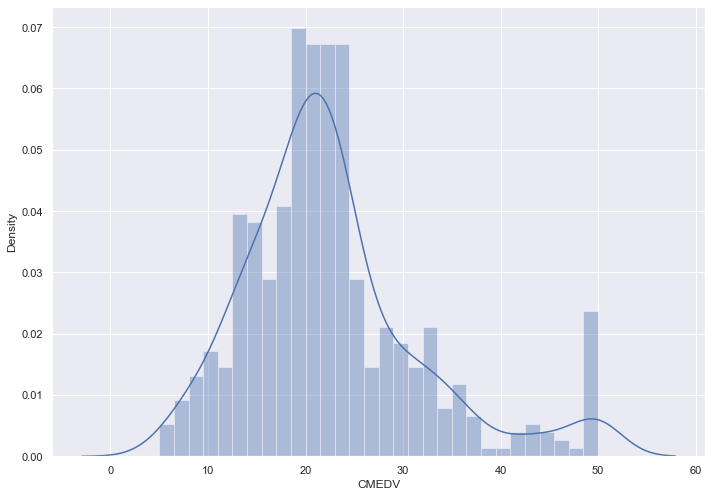

In [10]:
#Visualizamos el MEDV (corregido) en una gráfica

# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plot a histogram showing the distribution of the target values
sns.distplot(boston['CMEDV'], bins=30)
plt.show()

#observamos que, a pesar de ser los valores "corregidos" hay un pico o outlier en el 50

##### (b) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.<hr>

* We can firstly see that the CHAS data has close to no correlation with any other data, since every correlation is close to zero. This could be due to it's binary nature, since values take either 0 or 1, and no other predictor seems to have such behavior. Its strongest positive correlation is 0.18 with CMEDV and strongest negative correlation with PTRatio is -0.12, meaning CHAS could be a predictor considered for omission in this analysis.
* Another thing we found was that CRIM data has the strongest positive correlation with the RAD data, and has its strongest negative correlations with both the CMEDV data and B data.
* The B data has mostly negative or close to no correlation with other data except for CMEDV and DIS' data. Similarly, DIS data has a negative correlation with almost all the other data, except with the ZN, CMEDV, RM and B data.
* The RAD data and the TAX data have the strongest positive correlation (0.91) among predictors, almost reaching their own correlations of 1. Their correlation numbers are thus very close in the same situations. This can also be seen in their plots against the same other predictors, since they are very similar.
* On the other hand, DIS and NOX data have the strongest negative correlation (-0.77) among predictors in the data set.
* Furthermore, predictors which are plotted against the same common predictor, and have the negative and positive of more or so the same correlation number, may have fairly similar reflected plots. The biggest examples are AGE and DIS data's correlations; taking LSTAT, it can be seen since its correlation with AGE is 0.6 and its correlation with DIS is -0.5.
* Viewing the diagonal plots containing the intersection of predictors with themeselves, we can observe its data tendencies. As an example, CRIM's data seems to be mostly composed of low per capita crime values. INDUS, RAD, and TAX data seem to have polarized opposite values.
  
    
* There are some close inverse correlations between predictors compared to a same predictor, such as LSTAT and RM against CMEDV. As a result, their plots are similar reflections of one another. Nevertheless, their correlation values against the same predictors can vary a lot, since correlation between LSTAT and RM is -0.61, meaning they have a 61% probability of having their data behave like the inverse of one another.

In [11]:
#Creamos la matriz de correlacion
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

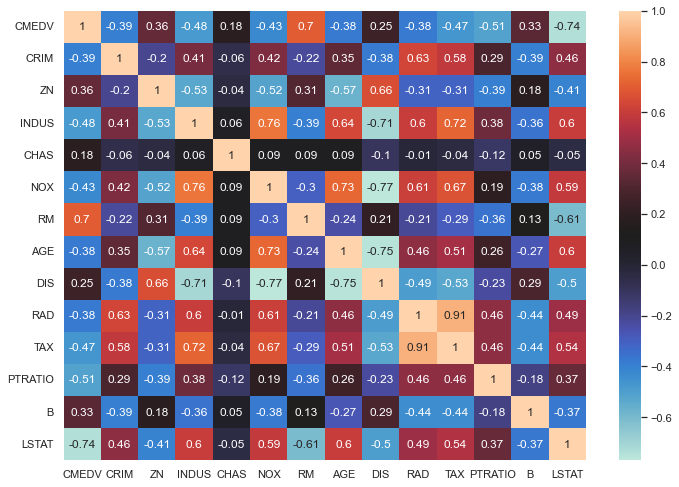

In [12]:
#Visualizamos nuestra matriz en un heatmap
#Valores rojos son cercanos a 1, azules cercanos a -1 y negros a 0
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(data=correlation_matrix, annot=True, cmap = "icefire")

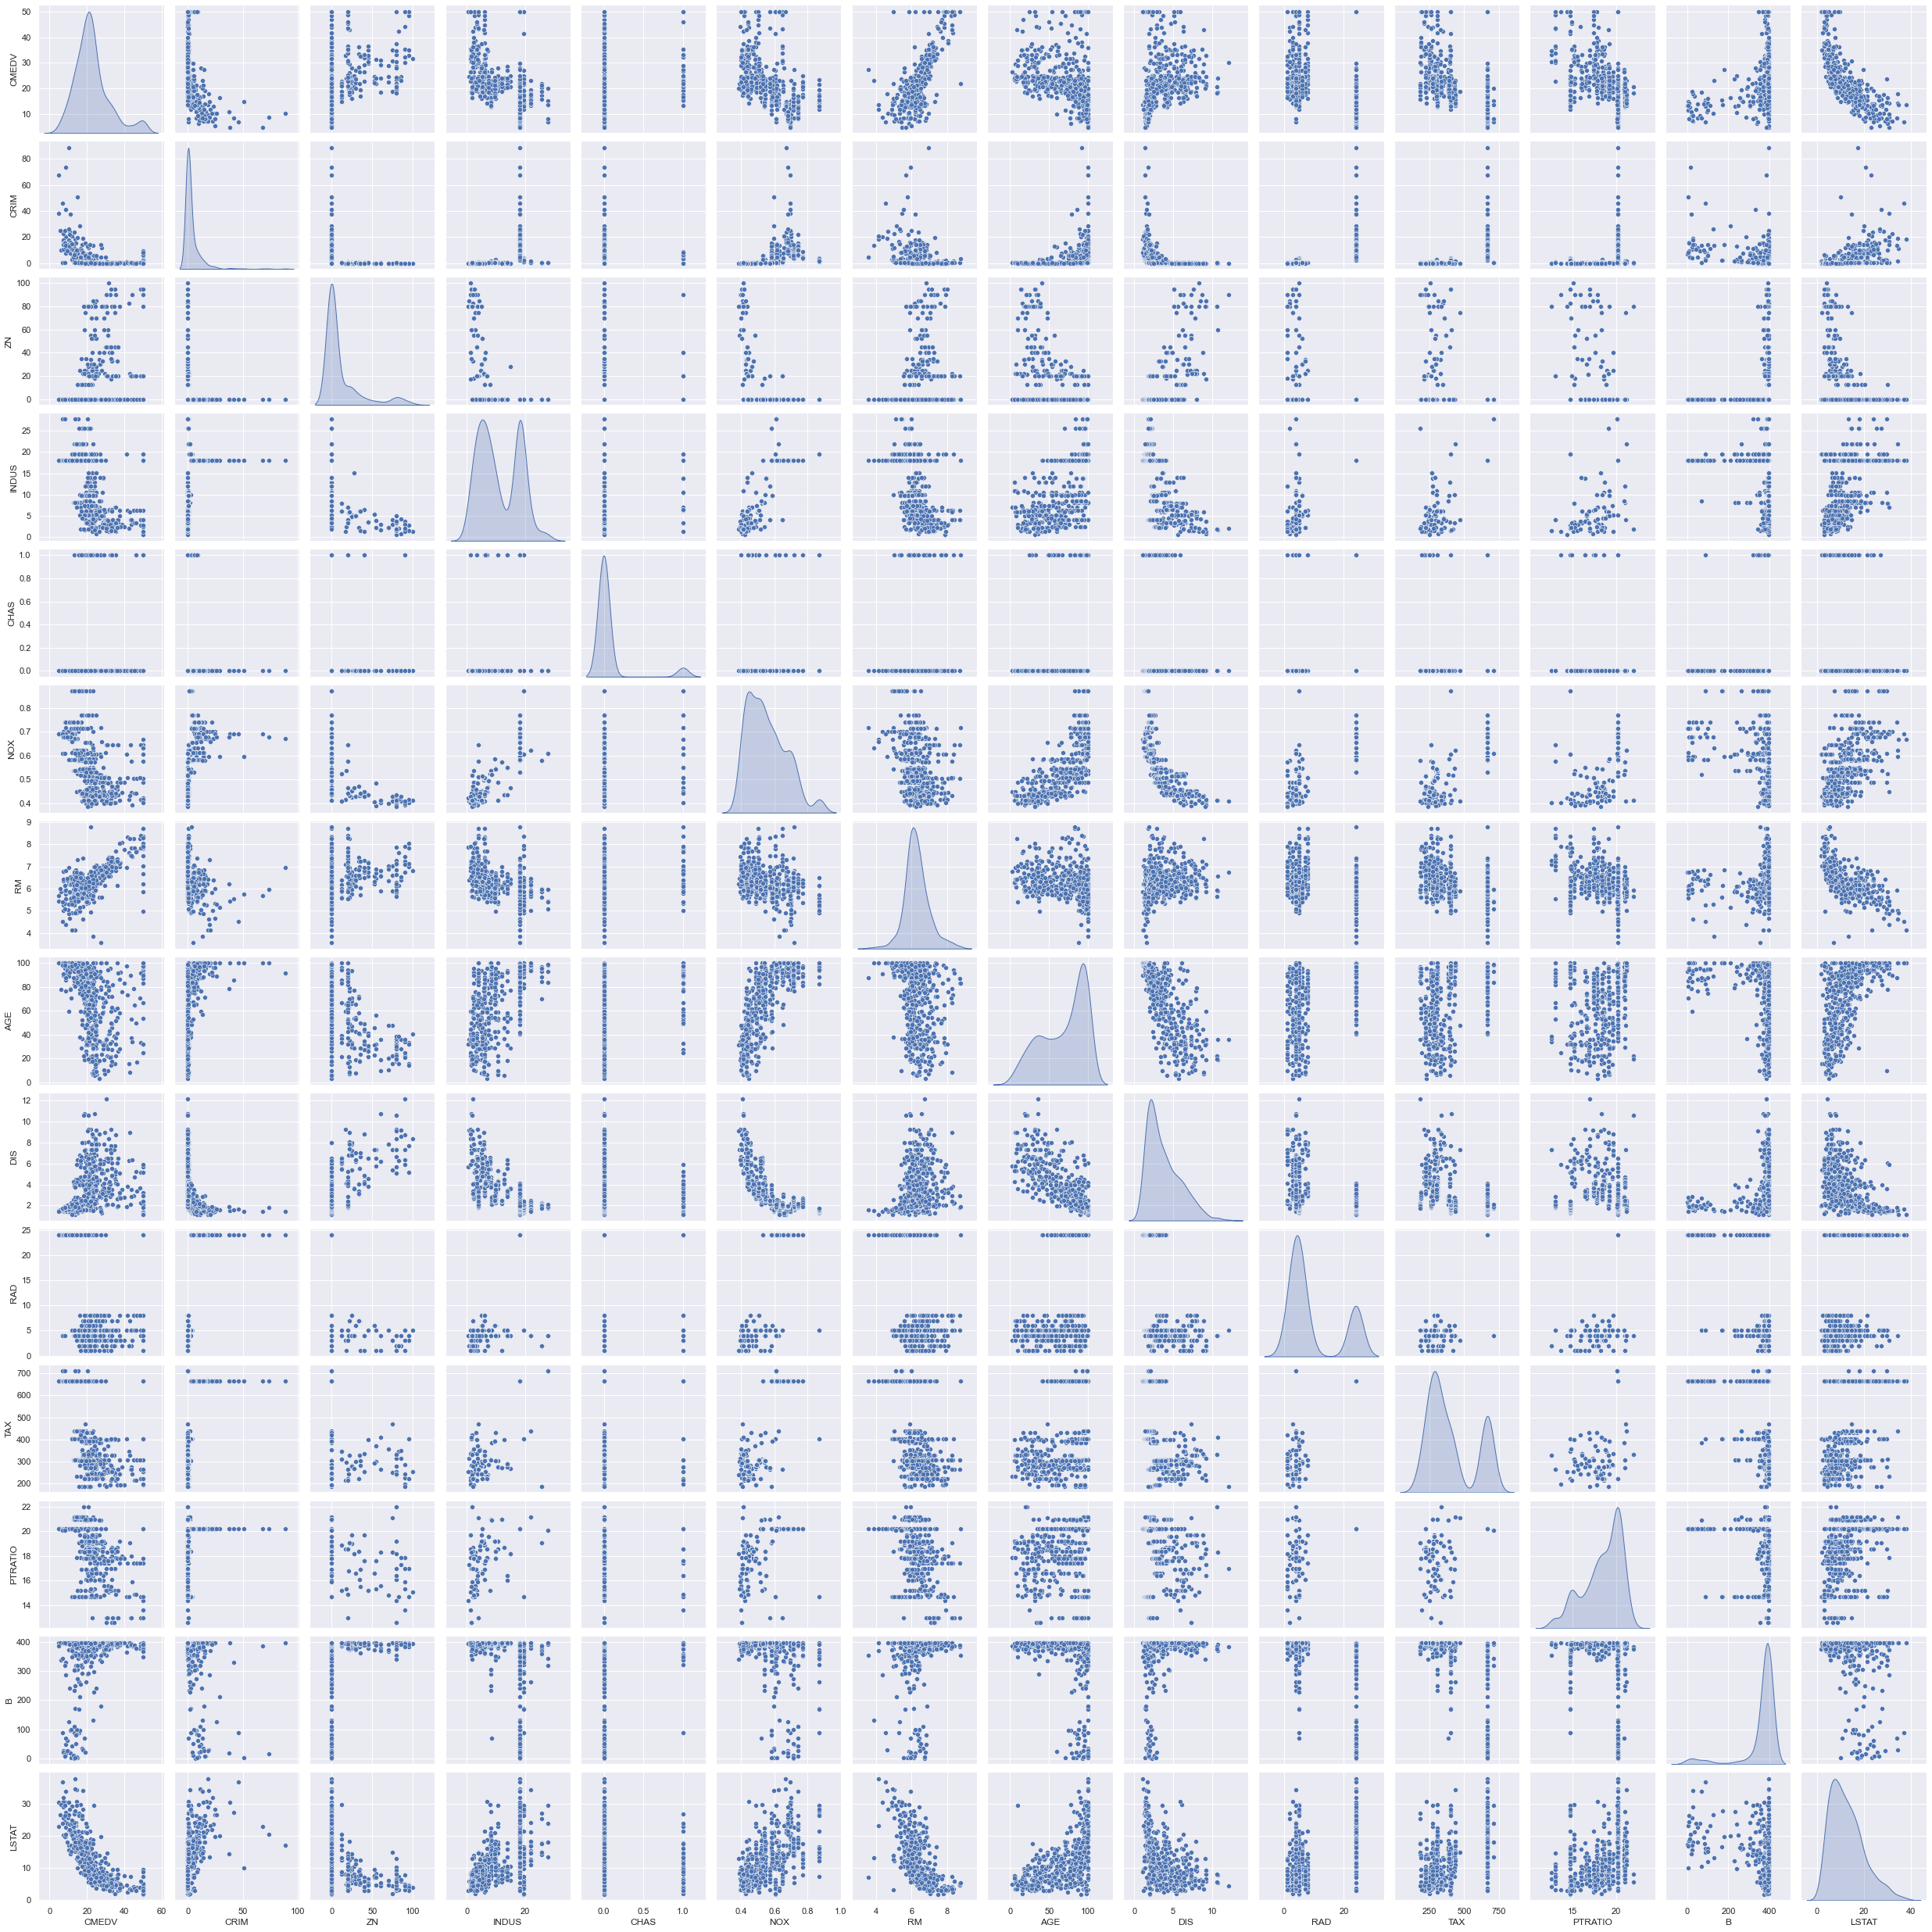

In [13]:
#Ahora observamos las gráficas de correlación entre pares de variables
sns.pairplot(boston, diag_kind = 'kde')

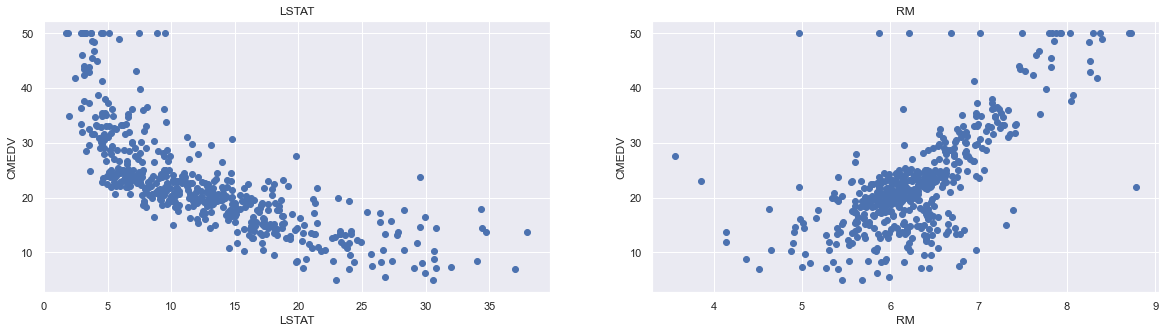

In [14]:
#Graficamos LSTAT y RM vs CMEDV

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['CMEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('CMEDV')

#LSTAT parece tener una relacion inversamente proporcional con CMEDV
#RM tiene una relacion directamente proporcional aunque con un gran número de outliers

##### (c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship. <hr>
The RAD data has the strongest positive correlation with per capita crime, we can see this in the correlational matrix with a 0.63. This means that when there is data with a higher index of accesibility to radial highways, there is a bigger probability that data of per capita crime rate will have higher values. As mentioned, RAD data has a strong relation with the TAX data, so it means TAX data has a similar relation with the per capita crime too (proven with a correlation value of 0.58, second strongest positive correlation with CRIM).   
LSTAT, NOX, and INDUS are the next strongest positive predictors, with similar correlation values; however, given they are lesser than 0.50, their relationship with per capita crime may be ambiguous and not clearly visible, yet can be considered.   
CMDEV, DIS, and B data are all the strongest negative correlations; however, since they are greater than -0.50, their relationship is similar to the past case.

##### (d) Suburbs with high predictors. Comment on the range of each predictor.<hr>
1. **Do any of the suburbs of Boston appear to have particularly high crime rates?**  
Yes, we can identify Boston Roxbury, Boston Downtown and Boston Charleston
These three have the highest crime rate of them all. However, it is very clear Roxbury stands out from the others by a long shot.
We can also observe very few exceed the 3.61 mean

In [15]:
boston_crime = boston.groupby('TOWN').first().reset_index().sort_values('CRIM', ascending=False)[['TOWN', 'CRIM']]
boston_crime.loc[boston_crime['CRIM'].astype(float) > 3.61][['TOWN', 'CRIM']]

TOWN      CRIM
16           Boston Roxbury  45.74610
10          Boston Downtown  20.71620
8        Boston Charlestown  19.60910
11       Boston East Boston  15.87440
15         Boston North End  11.10810
5   Boston Allston-Brighton   8.98296
18      Boston South Boston   8.64476
7        Boston Beacon Hill   6.53876
19      Boston West Roxbury   5.82401
17        Boston Savin Hill   5.58107
9         Boston Dorchester   4.66883
12      Boston Forest Hills   4.64689
14          Boston Mattapan   4.42228

2. **Do any of the suburbs of Boston appear to have particularly high tax rates?**
Yes. Chelsea has the highest tax rate with 711, almost 75% higher than the mean.
It is then followed by 15 towns with 666, 63% higher than the mean.
The results aren't as extreme as the crime rate, but they are still significantly high.

In [16]:
boston_tax = boston.groupby('TOWN').first().reset_index().sort_values('TAX', ascending=False)[['TOWN', 'TAX']]
boston_tax.loc[boston_tax['TAX'].astype(float) > 408.23][['TOWN', 'TAX']]

TOWN  TAX
25                  Chelsea  711
12      Boston Forest Hills  666
11       Boston East Boston  666
18      Boston South Boston  666
17        Boston Savin Hill  666
16           Boston Roxbury  666
15         Boston North End  666
14          Boston Mattapan  666
13         Boston Hyde Park  666
10          Boston Downtown  666
9         Boston Dorchester  666
8        Boston Charlestown  666
7        Boston Beacon Hill  666
6           Boston Back Bay  666
5   Boston Allston-Brighton  666
19      Boston West Roxbury  666
50                Middleton  469
73               Somerville  437
43                   Malden  432
64                 Randolph  430
38                     Hull  422
46               Marshfield  411

3. **Do any of the suburbs of Boston appear to have particularly high pupil-teacher ratios?**
Not really. Even Pembroke with the highest PT ratio is only 20% higher than the mean.
From this we can deduce that most values are close to the mean.

In [17]:
boston_pt = boston.groupby('TOWN').first().reset_index().sort_values('PTRATIO', ascending=False)[['TOWN', 'PTRATIO']]
boston_pt.loc[boston_pt['PTRATIO'].astype(float) > 18.45][['TOWN', 'PTRATIO']]

TOWN  PTRATIO
62                 Pembroke     22.0
73               Somerville     21.2
50                Middleton     21.1
90                 Winthrop     21.0
41                     Lynn     21.0
48                  Medford     20.9
87                 Weymouth     20.2
13         Boston Hyde Park     20.2
19      Boston West Roxbury     20.2
18      Boston South Boston     20.2
16           Boston Roxbury     20.2
15         Boston North End     20.2
14          Boston Mattapan     20.2
17        Boston Savin Hill     20.2
12      Boston Forest Hills     20.2
8        Boston Charlestown     20.2
5   Boston Allston-Brighton     20.2
11       Boston East Boston     20.2
7        Boston Beacon Hill     20.2
6           Boston Back Bay     20.2
9         Boston Dorchester     20.2
10          Boston Downtown     20.2
25                  Chelsea     20.1
4                   Beverly     19.7
70                 Scituate     19.7
20                Braintree     19.6
22               Burlington     19.2
86                 Westwood     19.2
69                   Sargus     19.2
66                   Revere     19.2
32                  Everett     19.1
33               Framingham     19.1
65                  Reading     19.0
88               Wilmington     18.9
67                 Rockland     18.8
91                   Woburn     18.7
45               Marblehead     18.7
29                   Dedham     18.6
80                  Waltham     18.6
44               Manchester     18.6
78                Wakefield     18.5

##### (e) How many of the suburbs in this data set bound the Charles river? <hr>
11 suburbs

In [18]:
# Seleccionamos todos los cercanos al río (CHAS == 1), después se seleccionan los nombres únicos del TOWN
print(boston.loc[boston['CHAS'] == 1]['TOWN'].unique())
# Misma selección, pero con .shape para contar los TOWN resultantes
print(boston.loc[boston['CHAS'] == 1]['TOWN'].unique().shape)
#

['Cambridge' 'Waltham' 'Watertown' 'Newton' 'Dedham' 'Needham' 'Wellesley'
 'Dover' 'Boston Allston-Brighton' 'Boston Back Bay' 'Boston Beacon Hill']
(11,)


##### (f) What is the median pupil-teacher ratio among the towns in this data set? <hr>  
From the .describe() function, we can see that the median (50%) among the towns' pupil-teacher ratio is 19.05.

In [19]:
#Visualizamos resúmenes de predictores
boston.describe()

CMEDV        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    3.613524   11.363636   11.136779    0.069170    0.554695   
std      9.182176    8.601545   23.322453    6.860353    0.253994    0.115878   
min      5.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%     17.025000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%     21.200000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%     25.000000    3.677083   12.500000   18.100000    0.000000    0.624000   
max     50.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.148861    2.105710    8.707259  168.537116    2.164946   
min      3.561000    2.900000    1.129600    1.000000  187.000000   12.600000   
25%      5.885500   45.025000    2.100175    4.000000  279.000000   17.400000   
50%      6.208500   77.500000    3.207450    5.000000  330.000000   19.050000   
75%      6.623500   94.075000    5.188425   24.000000  666.000000   20.200000   
max      8.780000  100.000000   12.126500   24.000000  711.000000   22.000000   

                B       LSTAT  
count  506.000000  506.000000  
mean   356.674032   12.653063  
std     91.294864    7.141062  
min      0.320000    1.730000  
25%    375.377500    6.950000  
50%    391.440000   11.360000  
75%    396.225000   16.955000  
max    396.900000   37.970000

##### (g) Suburbs with lowest CMEDV. Comment on your findings. <hr>
1. **Which suburb of Boston has lowest median value of owner occupied homes?**   
Boston South Boston

In [20]:
boston.loc[boston['CMEDV'].idxmin()]['TOWN']
# https://stackoverflow.com/a/61801746/13282304

'Boston South Boston'

2. **What are the values of the other predictors for that suburb, and how do those values compare 
to the overall ranges for those predictors?**  
* <u>CMDEV</u>: It can be seen CMDEV values are between the overall range [5,50], where most values fall in the lower 50% of the range values (less than 27.5 owner occupied housing) and even in the lower 25% (less than 16.25 owner occupied housing). Two values are equal to 5.0, the lowest median in the data set. These data indicate that South Boston's owner occupied housing in USD 1000 is relatively low in comparison to other Boston towns.  
* <u>CRIM</u>: All CRIM values for South Boston fall between the overall CRIM range [0.006320, 88.976200]. The highest data being 67.92 (only record above Boston's 50%), 41.52, and 38.35. Almost half the records are on the lower 25%, the rest located in the lower half of the range.  
* <u>ZN</u>: All values are 0, being the lowest possible value according to the data set range of [0,100].  
* <u>INDUS</u>: All values are 18.1, meaning South Boston's proportions of non-retail business acres per town is relatively high comparing to other Boston towns, since from the range [0.46, 27.74], South Boston is close to 20.92, which is where 25% of the highest proportions begin.  
* <u>CHAS</u>: The value is 0 in this binary predictor, meaning it is within the lower range of this predictor [0,1].
* <u>NOX</u>: All values are 0.693, which in comparison is above the 50% (0.628 nitric oxides concentration) of Boston town's values, but lower than its 75% (0.7495 nitric oxides concentration). Considering the range is [0.385, 0.871].
* <u>RM</u>: Values range from 5.349 to 6.471, where Boston's RM range goes from 3.561 to 8.78. In comparison, RM's ranges stay approximately 2 rooms higher than the minimum value and 2 rooms lower than the maximum value.
* <u>AGE</u>: [2.9 and 100] is the general range, in which South Boston's AGE data ranges from 77.8 to 100, all values in Boston's 25% higher AGE range.
* <u>DIS</u>: South Boston's DIS values range from 1.4254 to 1.7912, where Boston's ranges go from 1.129600 to 12.1265, meaning Boston South weighted distances' to employment centers are on the lower end of the range, being less than 1 unit away from the minimum value.
* <u>RAD</u>: All RAD values are 24, and Boston ranges are [1,24], meaning South Boston's values belong to the highest index of accessibility to highways among the dataset.
* <u>TAX</u>: All TAX values for South Boston are 666, the general range is [187, 711], where the data belongs to the higher end of the range.
* <u>PTRATIO</u>: All PTRATIO values are 20.2, Boston's range being [12.6, 22], meaning South Boston's values are on the higher end of the range, almost reaching the maximum.
* <u>B</u>: In a range of [0.320000, 396.900000], South Boston goes from 329.46 to 396.90, once again meaning that in terms of position in the range, it is on the higher group of B values.
* <u>LSTAT</u>:  South Boston's LSTAT values go from 15.17 to 30.59, most values being lower than 20. General range which goes from 1.73 to 37.97, indicate most values are around the middle.

In [21]:
boston.loc[boston['TOWN'] == 'Boston South Boston']
# https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe

TOWN  CMEDV      CRIM   ZN  INDUS  CHAS    NOX     RM  \
393  Boston South Boston   13.8   8.64476  0.0   18.1     0  0.693  6.193   
394  Boston South Boston   12.7  13.35980  0.0   18.1     0  0.693  5.887   
395  Boston South Boston   13.1   8.71675  0.0   18.1     0  0.693  6.471   
396  Boston South Boston   12.5   5.87205  0.0   18.1     0  0.693  6.405   
397  Boston South Boston    8.5   7.67202  0.0   18.1     0  0.693  5.747   
398  Boston South Boston    5.0  38.35180  0.0   18.1     0  0.693  5.453   
399  Boston South Boston    6.3   9.91655  0.0   18.1     0  0.693  5.852   
400  Boston South Boston    5.6  25.04610  0.0   18.1     0  0.693  5.987   
401  Boston South Boston    7.2  14.23620  0.0   18.1     0  0.693  6.343   
402  Boston South Boston   12.1   9.59571  0.0   18.1     0  0.693  6.404   
403  Boston South Boston    8.3  24.80170  0.0   18.1     0  0.693  5.349   
404  Boston South Boston    8.5  41.52920  0.0   18.1     0  0.693  5.531   
405  Boston South Boston    5.0  67.92080  0.0   18.1     0  0.693  5.683   

       AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
393   92.6  1.7912   24  666     20.2  396.90  15.17  
394   94.7  1.7821   24  666     20.2  396.90  16.35  
395   98.8  1.7257   24  666     20.2  391.98  17.12  
396   96.0  1.6768   24  666     20.2  396.90  19.37  
397   98.9  1.6334   24  666     20.2  393.10  19.92  
398  100.0  1.4896   24  666     20.2  396.90  30.59  
399   77.8  1.5004   24  666     20.2  338.16  29.97  
400  100.0  1.5888   24  666     20.2  396.90  26.77  
401  100.0  1.5741   24  666     20.2  396.90  20.32  
402  100.0  1.6390   24  666     20.2  376.11  20.31  
403   96.0  1.7028   24  666     20.2  396.90  19.77  
404   85.4  1.6074   24  666     20.2  329.46  27.38  
405  100.0  1.4254   24  666     20.2  384.97  22.98

##### (h) Suburbs' RM<hr>
1. *In this data set, how many of the suburbs average more than seven rooms per dwelling?*  
15 suburbs.
2. *More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.*
Only 2; the Boston Back Bay and Brookline. they average over 8.7 rooms per dwelling, a 10% jump from the 3rd place and 38.5% higher than the mean

In [22]:
boston_rooms = boston.groupby('TOWN').first().reset_index().sort_values('RM', ascending=False)[['TOWN', 'RM']]
boston_rooms.loc[boston_rooms['RM'].astype(float) > 7][['TOWN', 'RM']]
#boston_rooms.shape # 15 rows 2 columns

TOWN     RM
6      Boston Back Bay  8.780
21           Brookline  8.704
30               Dover  7.923
40             Lincoln  7.875
85              Weston  7.853
72            Sherborn  7.454
8   Boston Charlestown  7.313
27             Concord  7.287
77           Topsfield  7.249
26            Cohasset  7.241
52              Milton  7.236
44          Manchester  7.104
47            Medfield  7.088
7   Boston Beacon Hill  7.016
49             Melrose  7.007

In [23]:
boston_rooms = boston.groupby('TOWN').first().reset_index().sort_values('RM', ascending=False)[['TOWN', 'RM']]
boston_rooms.loc[boston_rooms['RM'].astype(float) > 8][['TOWN', 'RM']]
#boston_rooms.shape # 2 rows 2 columns

TOWN     RM
6   Boston Back Bay  8.780
21        Brookline  8.704

### 2.3 (Empirical) Dimension Reduction

##### (i) House value Prediction <hr>  
1. **Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value.** 

In [47]:
X_All = boston.drop(['CRIM', 'TOWN'], axis=1)
Y = boston['CMEDV']

In [48]:
from sklearn.model_selection import train_test_split

# Partimos los datos de training y test en 70% y 30%
# Asignamos un valor a random_state para asegurar que haya consistencia
X_train, X_test, Y_train, Y_test = train_test_split(X_All, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## 3. Model Creation and training

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## Prediction of New Data

In [50]:
def trainingTesting(X_train, X_test, Y_train, Y_test):
    #model training
    lin_model.fit(X_train, Y_train)
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)

    # R2 and MSE calulations
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # root mean square error of the model
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    # r-squared score of the model
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print()

    X_test_array = np.asarray(X_test)
    X_train_array = np.asarray(X_train)
    y_test_array = np.asarray(y_test_predict)
    y_train_array = np.asarray(y_train_predict)
    
    plt.plot(X_test_array,y_test_array , label="Training")
    plt.plot(X_train_array,y_train_array, label="Test")
    plt.show()

The model performance for training set
--------------------------------------
RMSE is 2.845614781880273e-14
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 2.944776595409788e-14
R2 score is 1.0



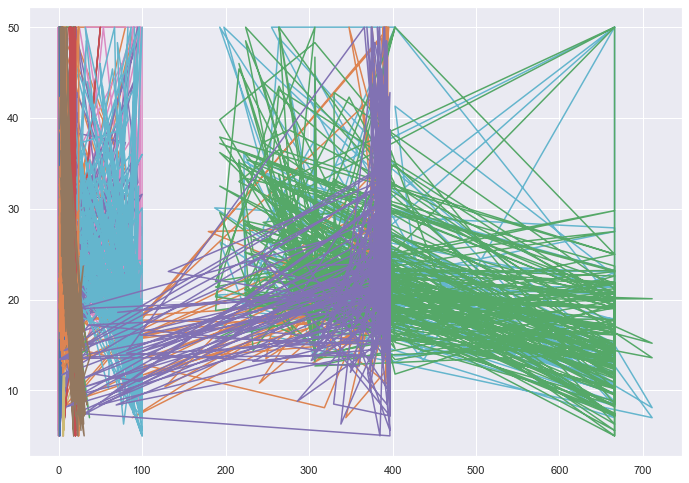

In [51]:
# model evaluation for training set
trainingTesting(X_train, X_test, Y_train, Y_test)

**1. How well did the model perform? How can you improve these results?**  
We tested the prediction based on predictors LSTAT and RM, which have the strongest negative and positive correlations to CMDEV and are also similar but opposite numbers (-0.74 and 0.70). This model's R2 (Determination Coefficient), has a value of 0.65 for training set tests and 0.61 for the testing set, both values greater than 0.5 and lesser than 0.7, thus making the model's performance average. 
These results can be improved on by adding or changing the predictors which act as the x values and applying the same tests, as to compare R2 and get a higher value.

In [52]:
X_CMEDV = pd.DataFrame(np.c_[boston['CRIM']], columns = ['CRIM'])
X_ZN = pd.DataFrame(np.c_[boston['ZN']], columns = ['ZN'])
X_INDUS = pd.DataFrame(np.c_[boston['INDUS']], columns = ['INDUS'])
X_CHAS = pd.DataFrame(np.c_[boston['CHAS']], columns = ['CHAS'])
X_NOX = pd.DataFrame(np.c_[boston['NOX']], columns = ['NOX'])
X_RM = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])
X_AGE = pd.DataFrame(np.c_[boston['AGE']], columns = ['AGE'])
X_DIS = pd.DataFrame(np.c_[boston['DIS']], columns = ['DIS'])
X_RAD = pd.DataFrame(np.c_[boston['RAD']], columns = ['RAD'])
X_TAX = pd.DataFrame(np.c_[boston['TAX']], columns = ['TAX'])
X_PTRATIO = pd.DataFrame(np.c_[boston['PTRATIO']], columns = ['PTRATIO'])
X_B = pd.DataFrame(np.c_[boston['B']], columns = ['B'])
X_LSTAT = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
# Definimos CRIM como nuestra Y
Y_CRIM = boston['CMEDV']

In [53]:
# Partimos los datos de training y test en 70% y 30%
# Asignamos un valor a random_state para asegurar que haya consistencia
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_CMEDV, Y_CRIM, test_size = 0.3, random_state=5)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_ZN, Y_CRIM, test_size = 0.3, random_state=5)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_INDUS, Y_CRIM, test_size = 0.3, random_state=5)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_CHAS, Y_CRIM, test_size = 0.3, random_state=5)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_NOX, Y_CRIM, test_size = 0.3, random_state=5)
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X_RM, Y_CRIM, test_size = 0.3, random_state=5)
X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X_AGE, Y_CRIM, test_size = 0.3, random_state=5)
X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X_DIS, Y_CRIM, test_size = 0.3, random_state=5)
X_train9, X_test9, Y_train9, Y_test9 = train_test_split(X_RAD, Y_CRIM, test_size = 0.3, random_state=5)
X_train10, X_test10, Y_train10, Y_test10 = train_test_split(X_TAX, Y_CRIM, test_size = 0.3, random_state=5)
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X_PTRATIO, Y_CRIM, test_size = 0.3, random_state=5)
X_train12, X_test12, Y_train12, Y_test12 = train_test_split(X_B, Y_CRIM, test_size = 0.3, random_state=5)
X_train13, X_test13, Y_train13, Y_test13 = train_test_split(X_LSTAT, Y_CRIM, test_size = 0.3, random_state=5)

In [54]:
lin_model = LinearRegression()

CMDEV
The model performance for training set
--------------------------------------
RMSE is 8.073299029073743
R2 score is 0.17834011151483464


The model performance for testing set
--------------------------------------
RMSE is 9.285000283298464
R2 score is 0.0959877262667942



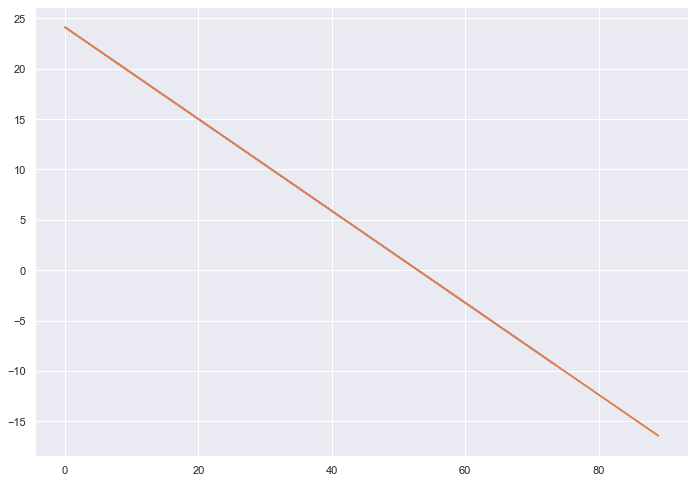

ZN
The model performance for training set
--------------------------------------
RMSE is 8.232621899620504
R2 score is 0.14558994870340847


The model performance for testing set
--------------------------------------
RMSE is 9.272624330449304
R2 score is 0.09839603142493736



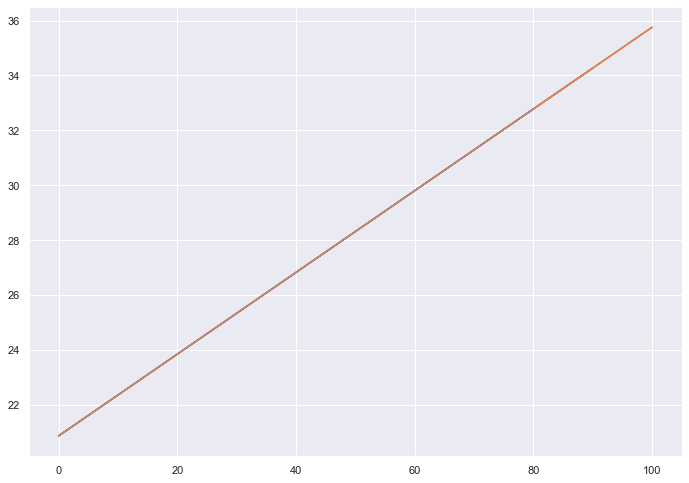

INDUS
The model performance for training set
--------------------------------------
RMSE is 7.580641546570841
R2 score is 0.27556081804677457


The model performance for testing set
--------------------------------------
RMSE is 8.99188883769696
R2 score is 0.1521630441638795



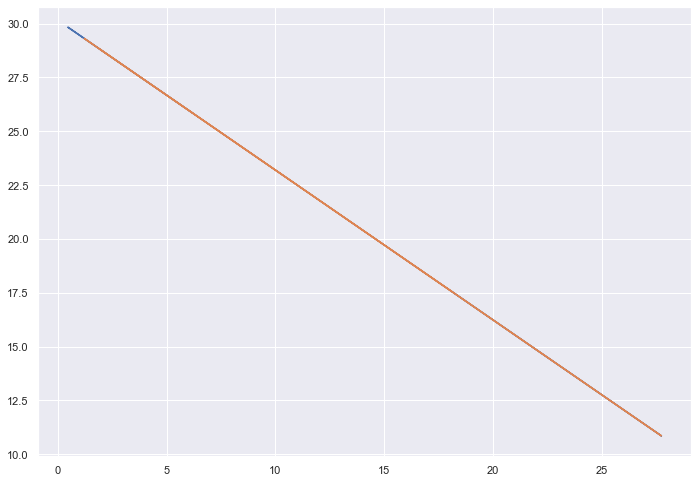

CHAS
The model performance for training set
--------------------------------------
RMSE is 8.881762428675554
R2 score is 0.005537723195860655


The model performance for testing set
--------------------------------------
RMSE is 9.510903654675166
R2 score is 0.05146349669095973



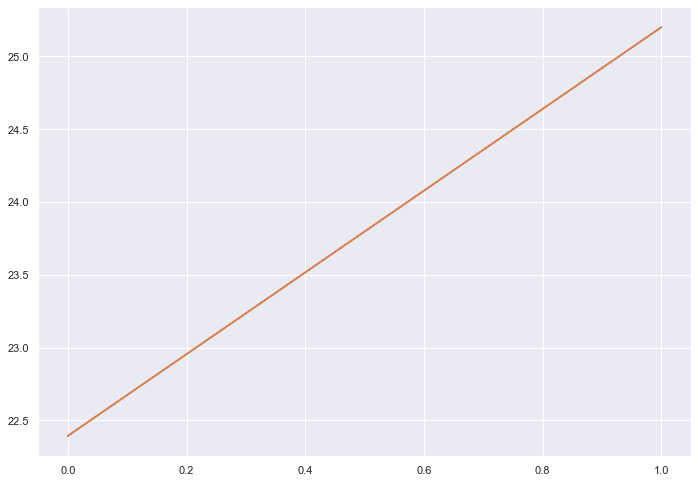

NOX
The model performance for training set
--------------------------------------
RMSE is 7.93114920542974
R2 score is 0.2070199723811178


The model performance for testing set
--------------------------------------
RMSE is 9.06073378756827
R2 score is 0.13913068993229938



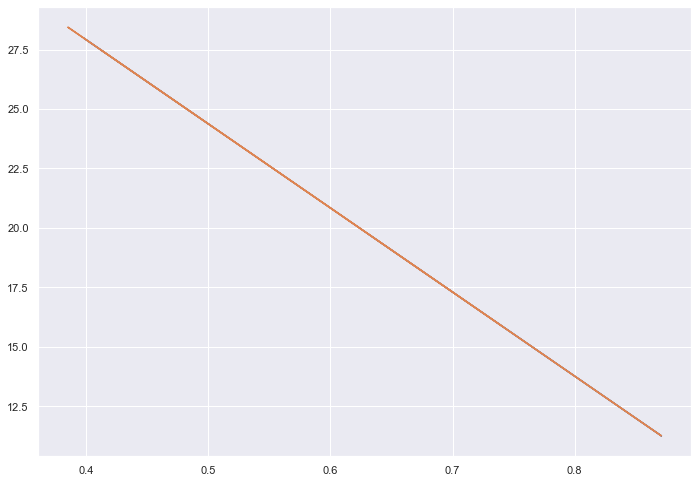

RM
The model performance for training set
--------------------------------------
RMSE is 6.4707036212176945
R2 score is 0.4721712702401163


The model performance for testing set
--------------------------------------
RMSE is 6.851039812332111
R2 score is 0.5078205611275675



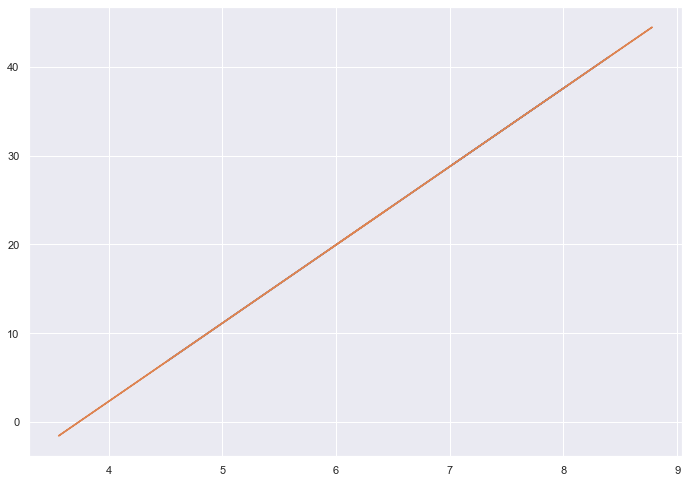

AGE
The model performance for training set
--------------------------------------
RMSE is 8.122052380377312
R2 score is 0.16838640436603036


The model performance for testing set
--------------------------------------
RMSE is 9.305708712428993
R2 score is 0.09195077419670672



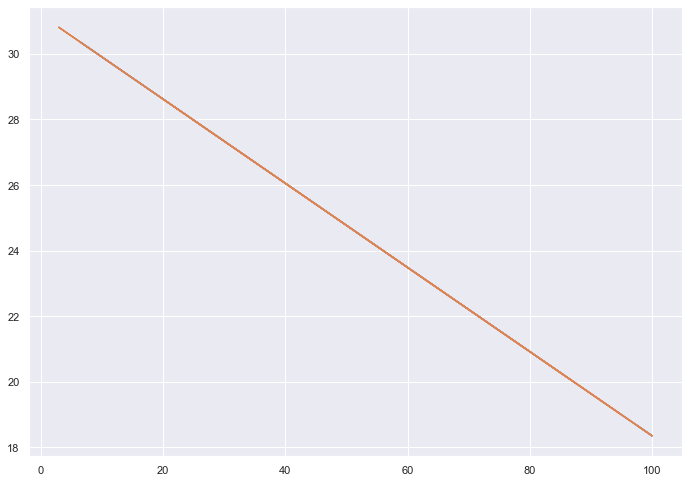

DIS
The model performance for training set
--------------------------------------
RMSE is 8.540589416008935
R2 score is 0.08047043662020992


The model performance for testing set
--------------------------------------
RMSE is 9.65213741852303
R2 score is 0.02308342763819815



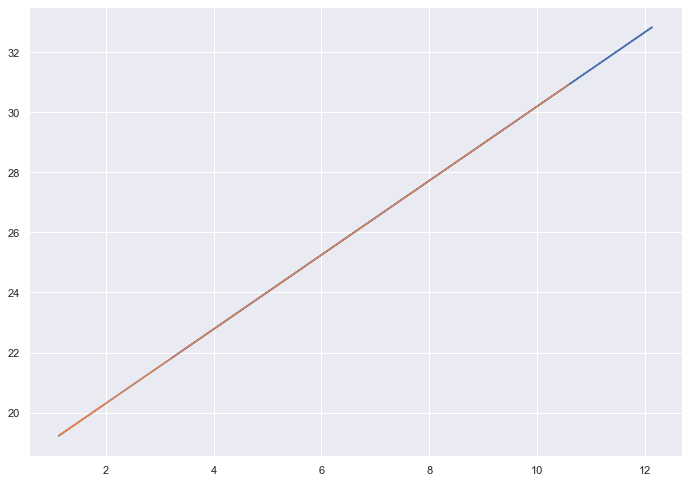

RAD
The model performance for training set
--------------------------------------
RMSE is 8.013033648340215
R2 score is 0.19056134269458025


The model performance for testing set
--------------------------------------
RMSE is 9.462424927958228
R2 score is 0.06110856298087086



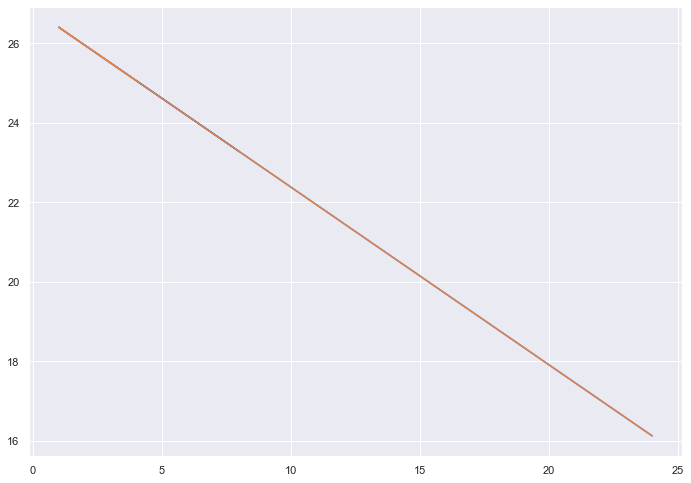

TAX
The model performance for training set
--------------------------------------
RMSE is 7.645979250459234
R2 score is 0.263019089133785


The model performance for testing set
--------------------------------------
RMSE is 9.040084882678984
R2 score is 0.14304996482946097



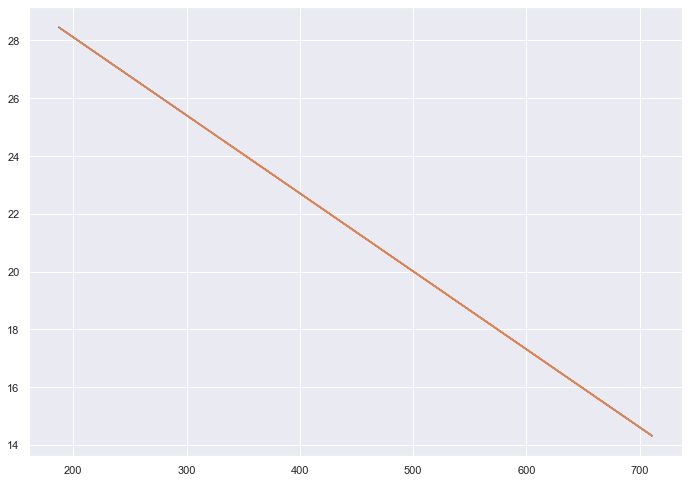

PTRATIO
The model performance for training set
--------------------------------------
RMSE is 7.497280044111345
R2 score is 0.2914059924176706


The model performance for testing set
--------------------------------------
RMSE is 8.818599421573289
R2 score is 0.1845267576785573



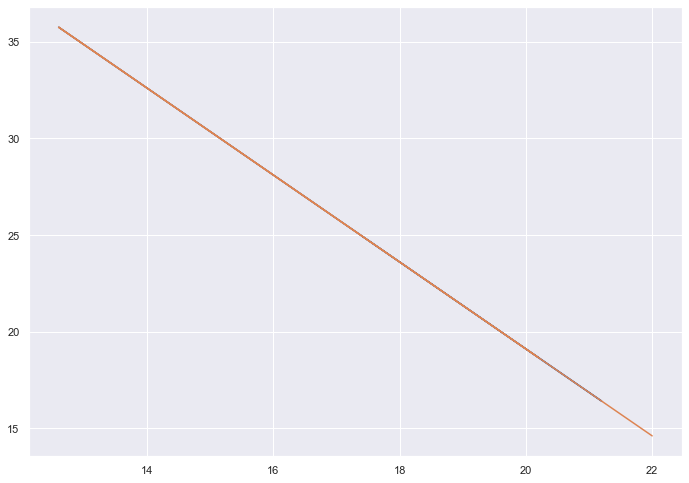

B
The model performance for training set
--------------------------------------
RMSE is 8.385103260901452
R2 score is 0.11364675454751272


The model performance for testing set
--------------------------------------
RMSE is 9.217873248441606
R2 score is 0.10901180846721048



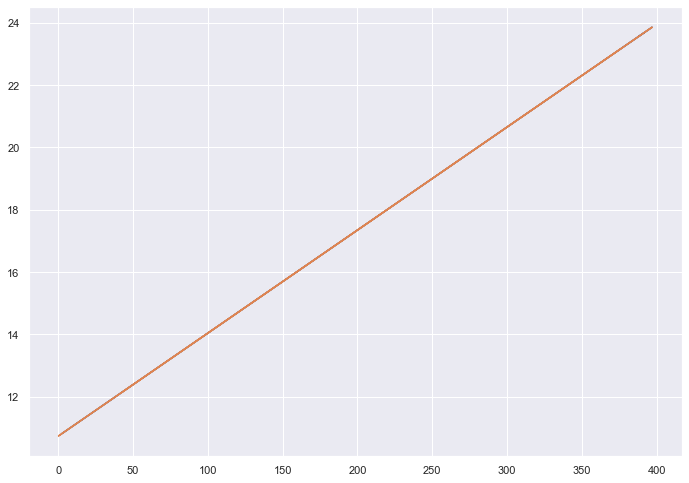

LSTAT
The model performance for training set
--------------------------------------
RMSE is 5.876168103905452
R2 score is 0.5647102589838475


The model performance for testing set
--------------------------------------
RMSE is 6.783609977253726
R2 score is 0.517461216741465



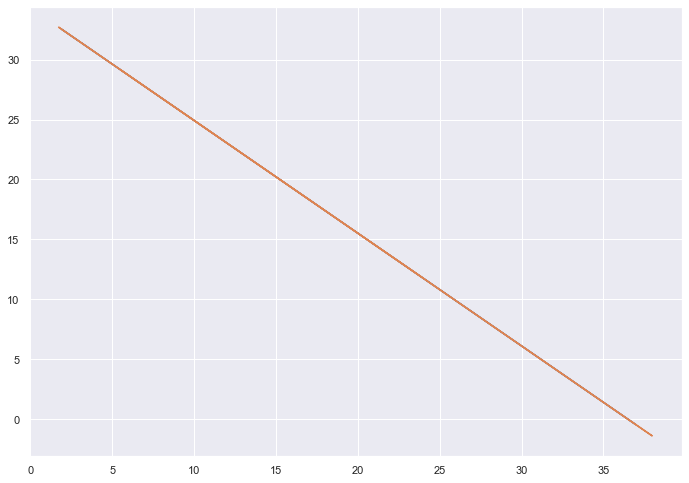

In [55]:
#CMDEV
print("CMDEV")
trainingTesting(X_train1, X_test1, Y_train1, Y_test1)
# ZN
print("ZN")
trainingTesting(X_train2, X_test2, Y_train2, Y_test2) 
# INDUS
print("INDUS")
trainingTesting(X_train3, X_test3, Y_train3, Y_test3) 
# CHAS 
print("CHAS")
trainingTesting(X_train4, X_test4, Y_train4, Y_test4) 
# NOX
print("NOX")
trainingTesting(X_train5, X_test5, Y_train5, Y_test5) 
# RM
print("RM")
trainingTesting(X_train6, X_test6, Y_train6, Y_test6) 
# AGE
print("AGE")
trainingTesting(X_train7, X_test7, Y_train7, Y_test7) 
# DIS
print("DIS")
trainingTesting(X_train8, X_test8, Y_train8, Y_test8) 
# RAD
print("RAD")
trainingTesting(X_train9, X_test9, Y_train9, Y_test9) 
# TAX
print("TAX")
trainingTesting(X_train10, X_test10, Y_train10, Y_test10) 
# PTRATIO
print("PTRATIO")
trainingTesting(X_train11, X_test11, Y_train11, Y_test11) 
# B
print("B")
trainingTesting(X_train12, X_test12, Y_train12, Y_test12) 
# LSTAT
print("LSTAT")
trainingTesting(X_train13, X_test13, Y_train13, Y_test13)

In [65]:
X_RM_LSTAT = pd.DataFrame(np.c_[boston['RM'],boston['LSTAT'] ], columns = ['RM','LSTAT'])
X_RM_B = pd.DataFrame(np.c_[boston['RM'],boston['B'] ], columns = ['RM','B'])
X_ZN_B = pd.DataFrame(np.c_[boston['ZN'],boston['B'] ], columns = ['ZN','B'])
X_RM_DIS = pd.DataFrame(np.c_[boston['RM'],boston['DIS'] ], columns = ['RM','DIS'])

X_RM_ZN_B = pd.DataFrame(np.c_[boston['RM'],boston['ZN'],boston['B']  ], columns = ['RM','ZN','B'])
X_RM_ZN_DIS = pd.DataFrame(np.c_[boston['RM'],boston['ZN'],boston['DIS']], columns = ['RM','ZN','DIS'])
X_RM_DIS_B = pd.DataFrame(np.c_[boston['RM'],boston['DIS'],boston['B']], columns = ['RM','DIS','B'])
X_LSTAT_PTRATIO_INDUS = pd.DataFrame(np.c_[boston['LSTAT'],boston['PTRATIO'],boston['INDUS'] ], columns = ['LSTAT','PTRATIO','INDUS'])

X_RM_ZN_B_DIS = pd.DataFrame(np.c_[boston['RM'],boston['ZN'],boston['B'],boston['DIS']], columns = ['RM','ZN','B','DIS'])
X_RM_ZN_B_CHAS = pd.DataFrame(np.c_[boston['RM'],boston['ZN'],boston['B'],boston['CHAS']], columns = ['RM','ZN','B','CHAS'])
X_RM_ZN_B_AGE = pd.DataFrame(np.c_[boston['RM'],boston['ZN'],boston['B'],boston['AGE']], columns = ['RM','ZN','B','AGE'] )
X_LSTAT_PTRATIO_INDUS_TAX = pd.DataFrame(np.c_[boston['LSTAT'],boston['PTRATIO'],boston['INDUS'],boston['TAX']], columns = ['LSTAT','PTRATIO','INDUS','TAX'])

Y_CMEDV = boston['CMEDV']

In [66]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_RM_LSTAT, Y_CMEDV, test_size = 0.3, random_state=5)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_RM_B, Y_CMEDV, test_size = 0.3, random_state=5)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_ZN_B, Y_CMEDV, test_size = 0.3, random_state=5)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_RM_DIS, Y_CMEDV, test_size = 0.3, random_state=5)

X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X_RM_ZN_B, Y_CMEDV, test_size = 0.3, random_state=5)
X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X_RM_ZN_DIS , Y_CMEDV, test_size = 0.3, random_state=5)
X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X_RM_DIS_B, Y_CMEDV, test_size = 0.3, random_state=5)
X_train9, X_test9, Y_train9, Y_test9 = train_test_split(X_LSTAT_PTRATIO_INDUS, Y_CMEDV, test_size = 0.3, random_state=5)

X_train10, X_test10, Y_train10, Y_test10 = train_test_split(X_RM_ZN_B_DIS, Y_CMEDV, test_size = 0.3, random_state=5)
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X_RM_ZN_B_CHAS , Y_CMEDV, test_size = 0.3, random_state=5)
X_train12, X_test12, Y_train12, Y_test12 = train_test_split(X_RM_ZN_B_AGE, Y_CMEDV, test_size = 0.3, random_state=5)
X_train13, X_test13, Y_train13, Y_test13 = train_test_split(X_LSTAT_PTRATIO_INDUS_TAX, Y_CMEDV, test_size = 0.3, random_state=5)

------------Model with all predictors
The model performance for training set
--------------------------------------
RMSE is 8.073299029073743
R2 score is 0.17834011151483464


The model performance for testing set
--------------------------------------
RMSE is 9.285000283298464
R2 score is 0.0959877262667942



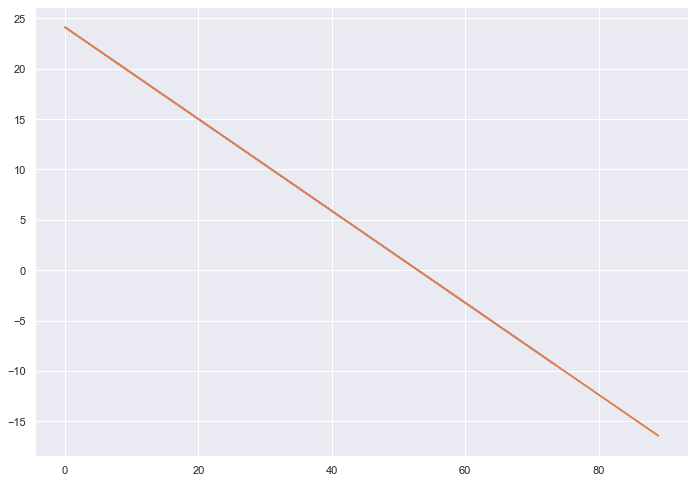

------------Model with RM and LSTAT
The model performance for training set
--------------------------------------
RMSE is 5.22667201712756
R2 score is 0.6556179513615119


The model performance for testing set
--------------------------------------
RMSE is 6.053705812807719
R2 score is 0.6157152870096305



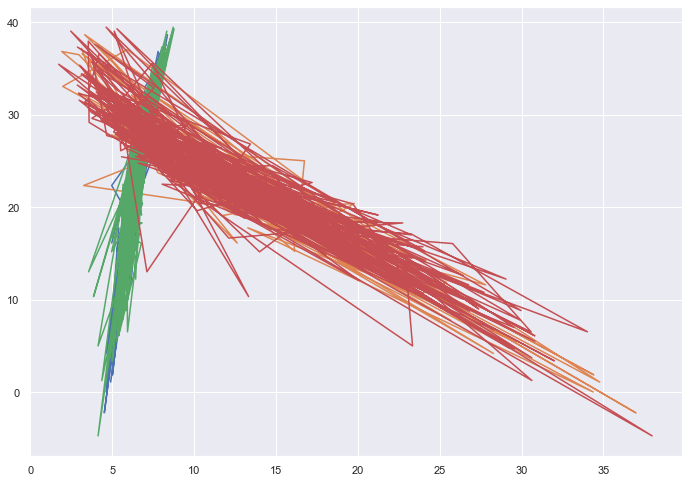

------------Model with RM and B
The model performance for training set
--------------------------------------
RMSE is 5.9226428843867565
R2 score is 0.5577975925646463


The model performance for testing set
--------------------------------------
RMSE is 6.768905585220201
R2 score is 0.5195508856056528



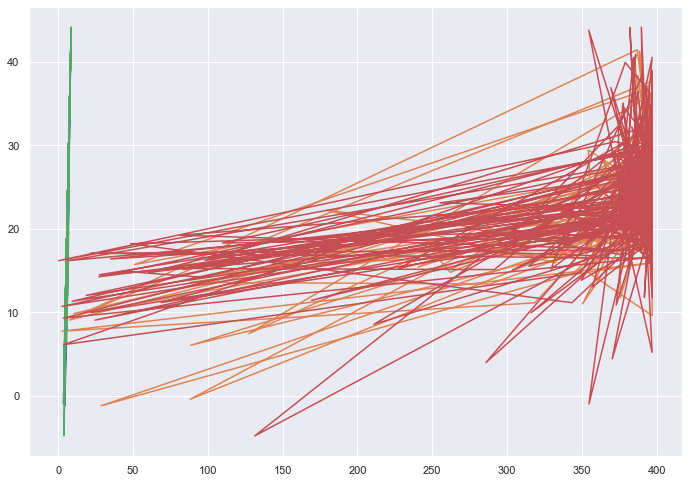

------------Model with ZN and B
The model performance for training set
--------------------------------------
RMSE is 7.86153464761837
R2 score is 0.22087942311930286


The model performance for testing set
--------------------------------------
RMSE is 8.864476299797309
R2 score is 0.1760200374708868



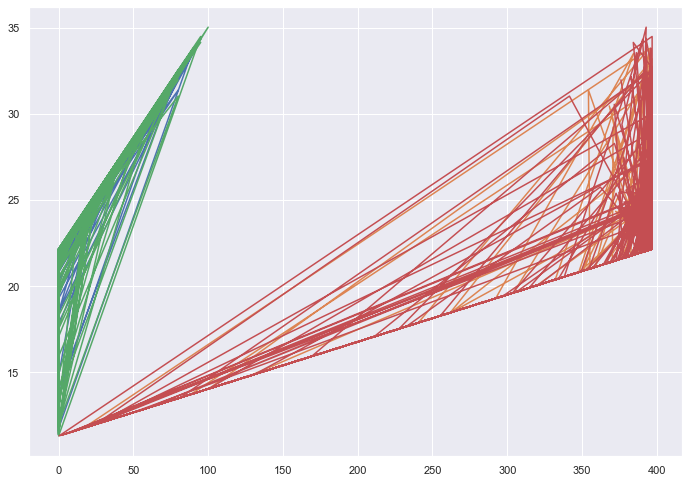

------------Model with RM and DIS
The model performance for training set
--------------------------------------
RMSE is 6.338521615597355
R2 score is 0.4935157320291029


The model performance for testing set
--------------------------------------
RMSE is 6.925608696513032
R2 score is 0.49704818008521157



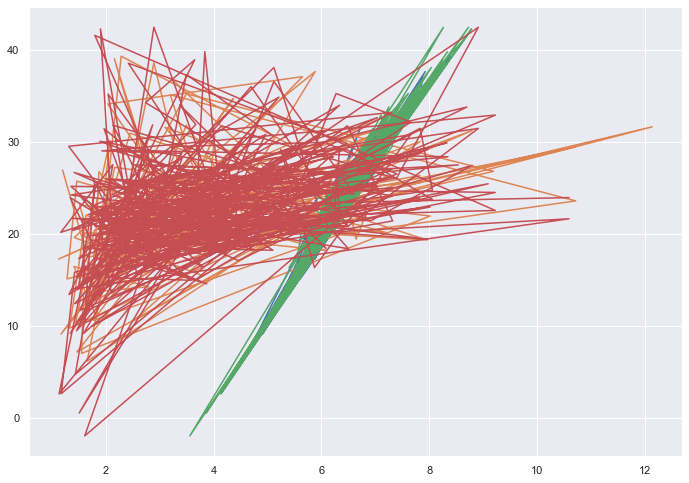

------------Model with RM and ZN and B
The model performance for training set
--------------------------------------
RMSE is 5.8041132254172565
R2 score is 0.57532004688746


The model performance for testing set
--------------------------------------
RMSE is 6.729808354323097
R2 score is 0.5250850094970622



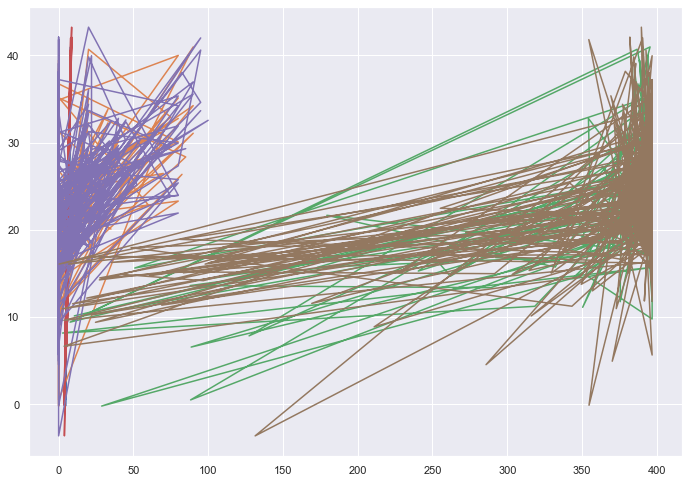

------------Model with RM and ZN and DIS
The model performance for training set
--------------------------------------
RMSE is 6.261024734304602
R2 score is 0.5058249126049921


The model performance for testing set
--------------------------------------
RMSE is 6.864968167758619
R2 score is 0.5058172977387105



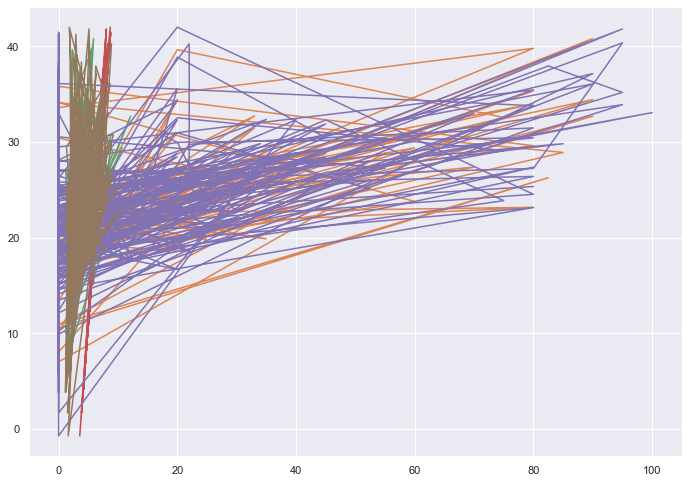

------------Model with RM and DIS and B
The model performance for training set
--------------------------------------
RMSE is 5.893436184476275
R2 score is 0.5621481598089223


The model performance for testing set
--------------------------------------
RMSE is 6.802371048212093
R2 score is 0.5147884619670247



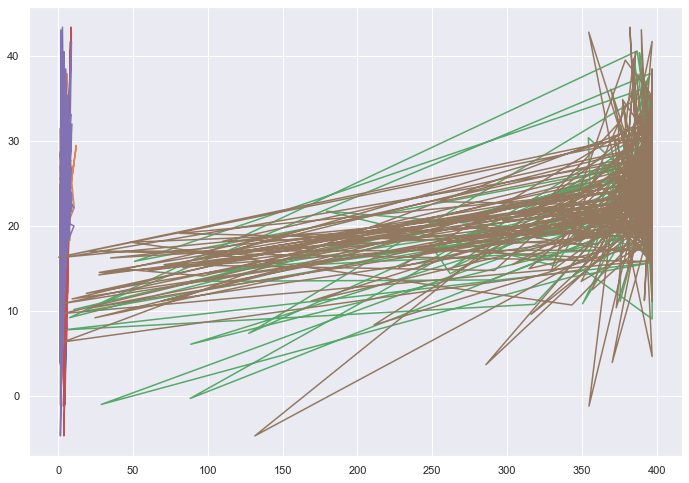

------------Model with LSTAT and PTRATIO and INDUS
The model performance for training set
--------------------------------------
RMSE is 5.300565923436098
R2 score is 0.6458114730193952


The model performance for testing set
--------------------------------------
RMSE is 6.683738544552399
R2 score is 0.5315649427932199



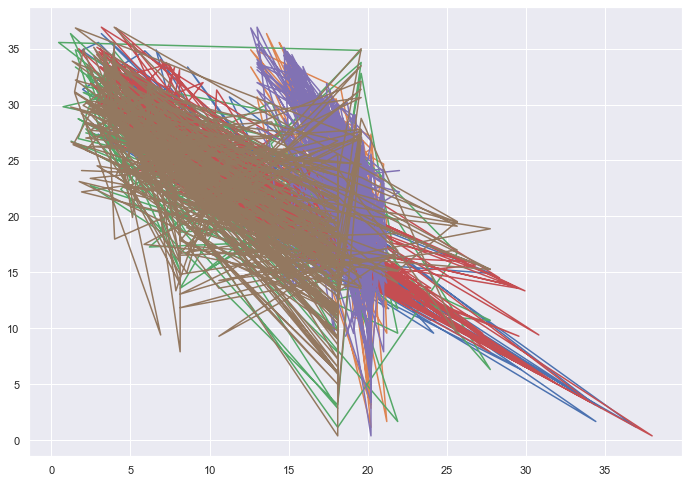

------------Model with RM and ZN and B and DIS
The model performance for training set
--------------------------------------
RMSE is 5.801126486766499
R2 score is 0.5757570065489506


The model performance for testing set
--------------------------------------
RMSE is 6.708755148344902
R2 score is 0.5280517637363595



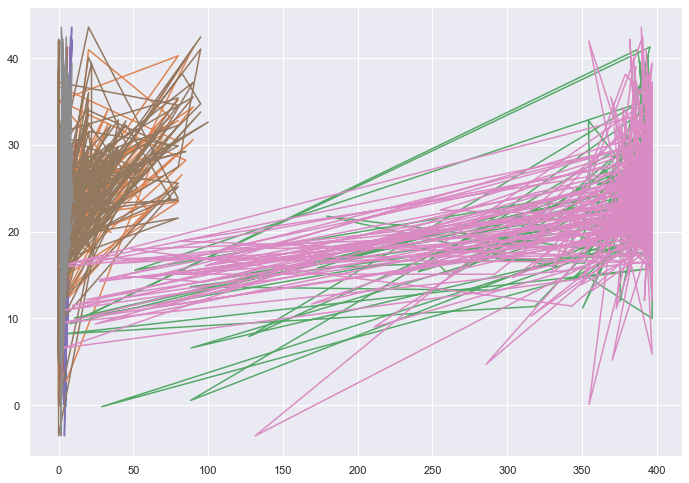

------------Model with RM and ZN and B and CHAS
The model performance for training set
--------------------------------------
RMSE is 5.786572250431758
R2 score is 0.5778830719857804


The model performance for testing set
--------------------------------------
RMSE is 6.569938369608021
R2 score is 0.5473806928681476



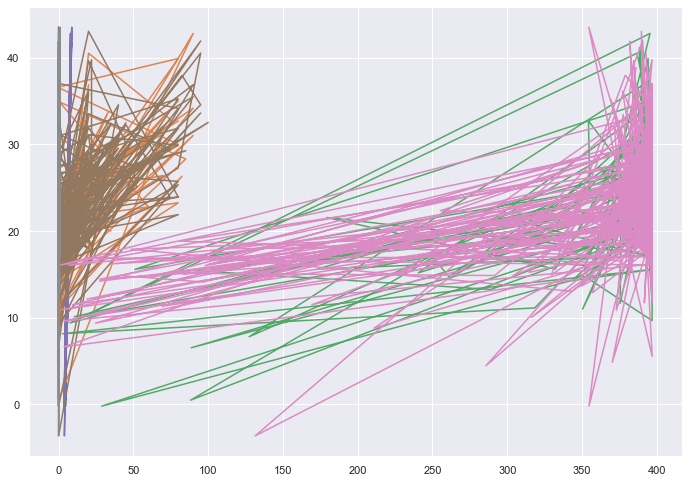

------------Model with RM and ZN and B and AGE
The model performance for training set
--------------------------------------
RMSE is 5.6677980618374555
R2 score is 0.5950338292534966


The model performance for testing set
--------------------------------------
RMSE is 6.732027295184949
R2 score is 0.5247717815557096



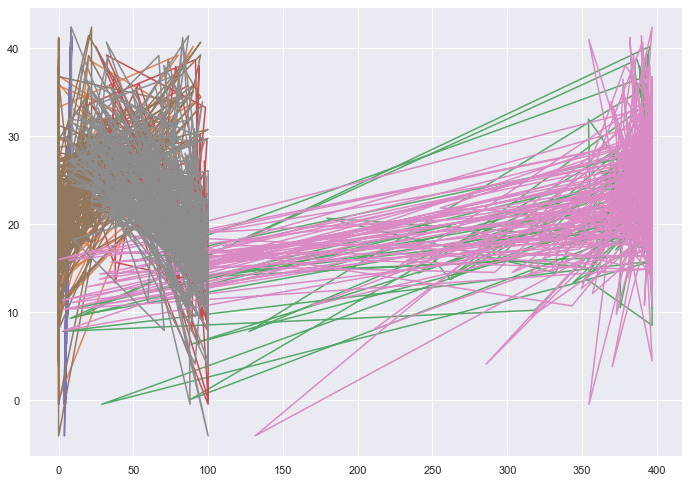

------------Model with LSTAT and PTRATIO and INDUS and TAX
The model performance for training set
--------------------------------------
RMSE is 5.300565250487263
R2 score is 0.6458115629534684


The model performance for testing set
--------------------------------------
RMSE is 6.683665613961014
R2 score is 0.5315751655328231



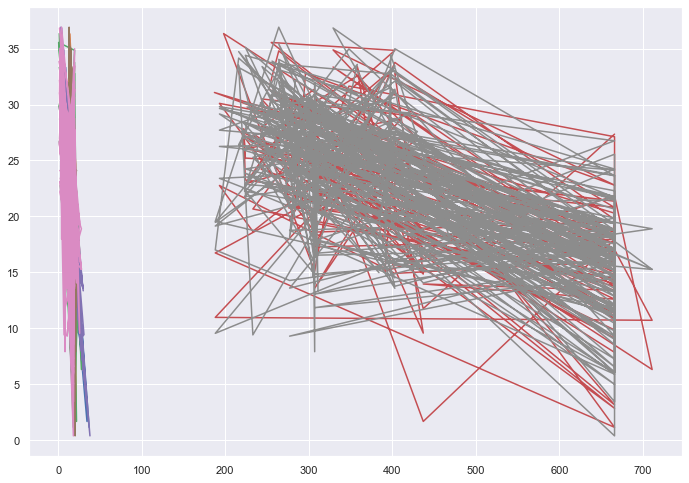

In [68]:
# model evaluation for training set
print("------------Model with all predictors")
trainingTesting(X_train1, X_test1, Y_train1, Y_test1)

print("------------Model with RM and LSTAT")
trainingTesting(X_train2, X_test2, Y_train2, Y_test2)

print("------------Model with RM and B")
trainingTesting(X_train3, X_test3, Y_train3, Y_test3)

print("------------Model with ZN and B")
trainingTesting(X_train4, X_test4, Y_train4, Y_test4)

print("------------Model with RM and DIS")
trainingTesting(X_train5, X_test5, Y_train5, Y_test5)

print("------------Model with RM and ZN and B")
trainingTesting(X_train6, X_test6, Y_train6, Y_test6)

print("------------Model with RM and ZN and DIS")
trainingTesting(X_train7, X_test7, Y_train7, Y_test7)

print("------------Model with RM and DIS and B")
trainingTesting(X_train8, X_test8, Y_train8, Y_test8)

print("------------Model with LSTAT and PTRATIO and INDUS")
trainingTesting(X_train9, X_test9, Y_train9, Y_test9)

print("------------Model with RM and ZN and B and DIS")
trainingTesting(X_train10, X_test10, Y_train10, Y_test10)

print("------------Model with RM and ZN and B and CHAS")
trainingTesting(X_train11, X_test11, Y_train11, Y_test11)

print("------------Model with RM and ZN and B and AGE")
trainingTesting(X_train12, X_test12, Y_train12, Y_test12)

print("------------Model with LSTAT and PTRATIO and INDUS and TAX")
trainingTesting(X_train13, X_test13, Y_train13, Y_test13)


## Visualization of Results

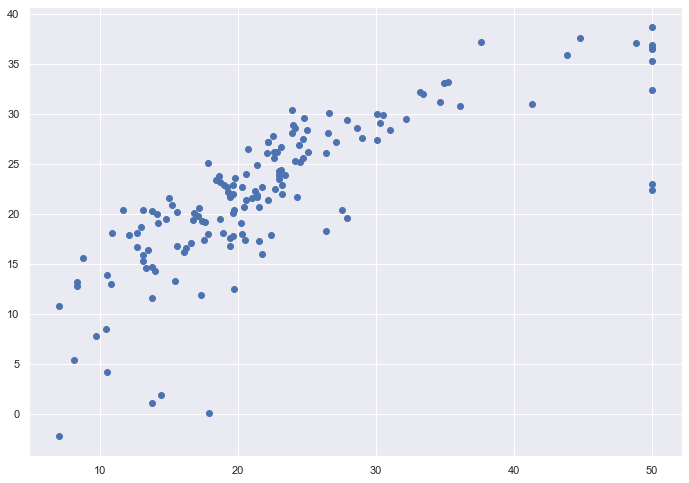

In [28]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

#### (j) Per Capita Crime Simple Regression Model<hr>
1. **We will now try to predict per capita crime rate using the other variables in this data set. In 
other words, per capita crime rate is the response, and the other variables are the predictors. 
For each predictor, individually, fit a simple linear regression model to predict the response. 
Describe your results.**   
From the 13 predictions, it can be seen the reponses correspond with its correlation values. First of all, it can be seen the linear regression models are positive or negative corresponding to its correlation. CMEDV as an example has a correlation of -0.39 and its model has a negative slope as well. Negative slopes and correlations include B, DIS, CHAS, RM, ZN, and CMEDV. Furthermore, it can be seen that as the R2 value increases, the RMSE decreases. This means the highest R2 is the lowest RMSE and viceversa.  
The lowest R2 represent the less likely to explain CRIM values, and they include CHAS (0.000188), RM (0.0673), ZN (0.0345), PTRATIO (0.080507), and CMEDV (0.0987). Given they are lesser than 0.1. Referring to the relationship seen between the model performance for training and testing sets, all RMSE increased by about 1 unit and R2 scores decreased from training to testing data. The exceptions to the R2 decrease included RM, AGE (although by merely 0.005), RAD, and B. B remains the greatesr R2 increase when compared to the training predictions, increasing from 0.0808 to 0.2331. Furthermore, it's error value still increasing is an interesting behavior.
  
2. **In which of the models is there a statistically significant association 
between the predictor and the response? Create some plots to back up your assertions.**  
Associating with CRIM, RAD with an R2 of 0.3939, TAX with an R2 of 0.3323 and B with an R2 of 0.2331 are the three models with the highest R2 score (variation percentage of CRIM explained by the independent values), while the RMSE are the lowest of them all: 7.2746, 7.6350, 8.1831 respectively. This means the predictors which are more likely to determine criminality rates are RAD (accessibility to radial highways), TAX (property-tax rates), and B (proportions of black people). RAD and TAX have the highest correlation values with CRIM. On the other hand, B has a correlation of -0.39 and a low R2 prediction from training data of 0.0808, meaning B has given better results than expected. Statiscally speaking, CRIM's most significant association is TAX; however, it stands under the 0.5 threshold for a model to be meaningful as a prediction to CRIM. Nevertheless, crime rate is a factor generated from human behaviour, meaning that although the highest R2 is lower than 0.5, these values may still help to give a partial prediction.

Although less relevant, LSTAT, NOX, and INDUS (correlations of 0.46, 0.42, and 0.41 respectively) have an R2 of 0.1785, 0.1459, and 0.1354, corresponding to the next highest R2 values. AGE and DIS have the other next highest R2 values of 0.1261 and 0.1227, with a correlation of 0.35 and -0.38.

##### 2.3.1 Dimension Reduction for Simple Regression Model

In [29]:
# Dividimos el dataframe en cada predictor, para definir las X de nuestro modelo
X_CMEDV = pd.DataFrame(np.c_[boston['CMEDV']], columns = ['CMEDV'])
X_ZN = pd.DataFrame(np.c_[boston['ZN']], columns = ['ZN'])
X_INDUS = pd.DataFrame(np.c_[boston['INDUS']], columns = ['INDUS'])
X_CHAS = pd.DataFrame(np.c_[boston['CHAS']], columns = ['CHAS'])
X_NOX = pd.DataFrame(np.c_[boston['NOX']], columns = ['NOX'])
X_RM = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])
X_AGE = pd.DataFrame(np.c_[boston['AGE']], columns = ['AGE'])
X_DIS = pd.DataFrame(np.c_[boston['DIS']], columns = ['DIS'])
X_RAD = pd.DataFrame(np.c_[boston['RAD']], columns = ['RAD'])
X_TAX = pd.DataFrame(np.c_[boston['TAX']], columns = ['TAX'])
X_PTRATIO = pd.DataFrame(np.c_[boston['PTRATIO']], columns = ['PTRATIO'])
X_B = pd.DataFrame(np.c_[boston['B']], columns = ['B'])
X_LSTAT = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
# Definimos CRIM como nuestra Y
Y_CRIM = boston['CRIM']

##### 2.4.1 Data Partitions for Simple Regression Model

In [30]:
# Partimos los datos de training y test en 70% y 30%
# Asignamos un valor a random_state para asegurar que haya consistencia
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_CMEDV, Y_CRIM, test_size = 0.3, random_state=5)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_ZN, Y_CRIM, test_size = 0.3, random_state=5)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_INDUS, Y_CRIM, test_size = 0.3, random_state=5)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_CHAS, Y_CRIM, test_size = 0.3, random_state=5)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_NOX, Y_CRIM, test_size = 0.3, random_state=5)
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X_RM, Y_CRIM, test_size = 0.3, random_state=5)
X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X_AGE, Y_CRIM, test_size = 0.3, random_state=5)
X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X_DIS, Y_CRIM, test_size = 0.3, random_state=5)
X_train9, X_test9, Y_train9, Y_test9 = train_test_split(X_RAD, Y_CRIM, test_size = 0.3, random_state=5)
X_train10, X_test10, Y_train10, Y_test10 = train_test_split(X_TAX, Y_CRIM, test_size = 0.3, random_state=5)
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X_PTRATIO, Y_CRIM, test_size = 0.3, random_state=5)
X_train12, X_test12, Y_train12, Y_test12 = train_test_split(X_B, Y_CRIM, test_size = 0.3, random_state=5)
X_train13, X_test13, Y_train13, Y_test13 = train_test_split(X_LSTAT, Y_CRIM, test_size = 0.3, random_state=5)

##### 3.1 Simple Regression Model Creation

In [31]:
lin_model = LinearRegression()

##### 4.1 Training and 5.1 Testing

CMDEV
The model performance for training set
--------------------------------------
RMSE is 7.473108811027102
R2 score is 0.17834011151483453


The model performance for testing set
--------------------------------------
RMSE is 8.871206191906479
R2 score is 0.09870403720297083



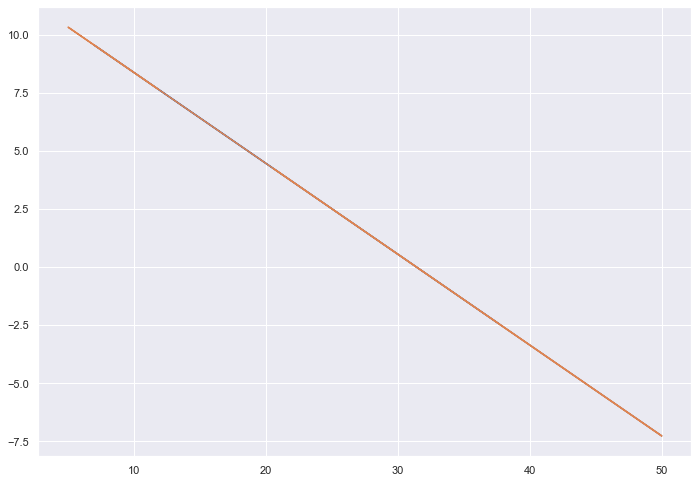

ZN
The model performance for training set
--------------------------------------
RMSE is 8.071065536780937
R2 score is 0.04159025206942901


The model performance for testing set
--------------------------------------
RMSE is 9.181604086546495
R2 score is 0.03452906880639406



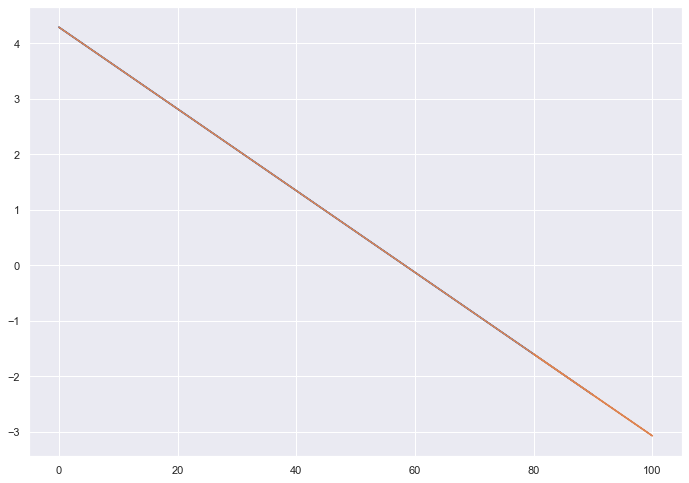

INDUS
The model performance for training set
--------------------------------------
RMSE is 7.462976774032952
R2 score is 0.1805666132350392


The model performance for testing set
--------------------------------------
RMSE is 8.68849404556648
R2 score is 0.1354480510140217



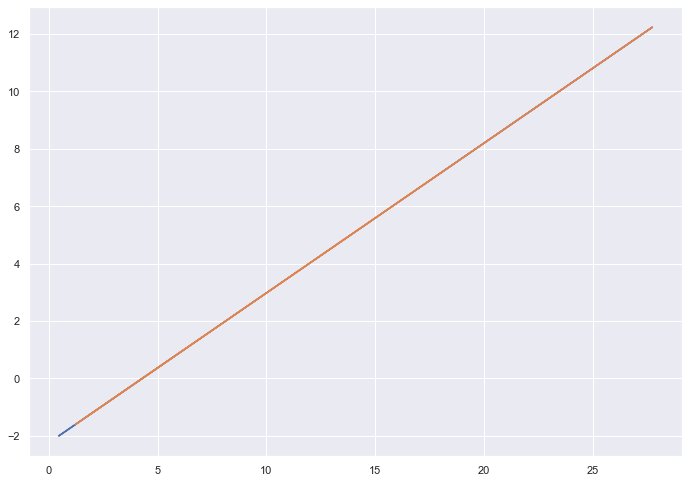

CHAS
The model performance for training set
--------------------------------------
RMSE is 8.232656200820017
R2 score is 0.002829473246826364


The model performance for testing set
--------------------------------------
RMSE is 9.343464990587876
R2 score is 0.00018878529637345043



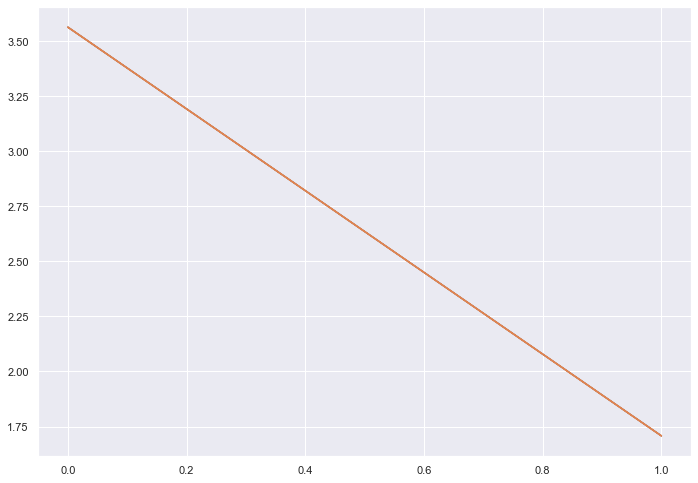

NOX
The model performance for training set
--------------------------------------
RMSE is 7.404564388694625
R2 score is 0.19334375065719067


The model performance for testing set
--------------------------------------
RMSE is 8.635608034318576
R2 score is 0.1459409049082192



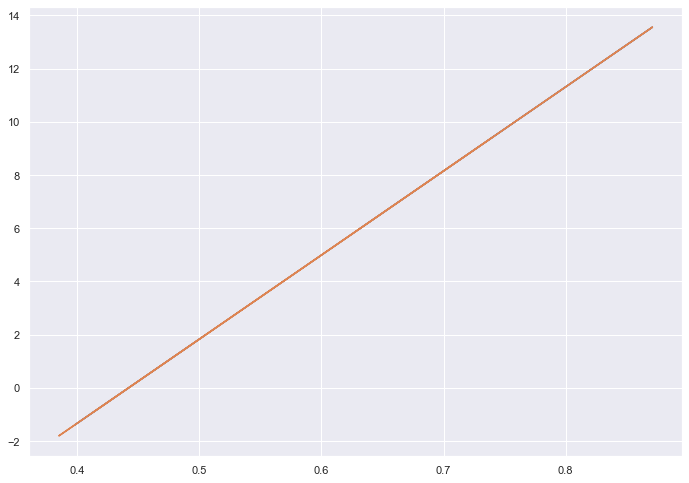

RM
The model performance for training set
--------------------------------------
RMSE is 8.106937404406247
R2 score is 0.0330520117773625


The model performance for testing set
--------------------------------------
RMSE is 9.024346860066329
R2 score is 0.06731790926568537



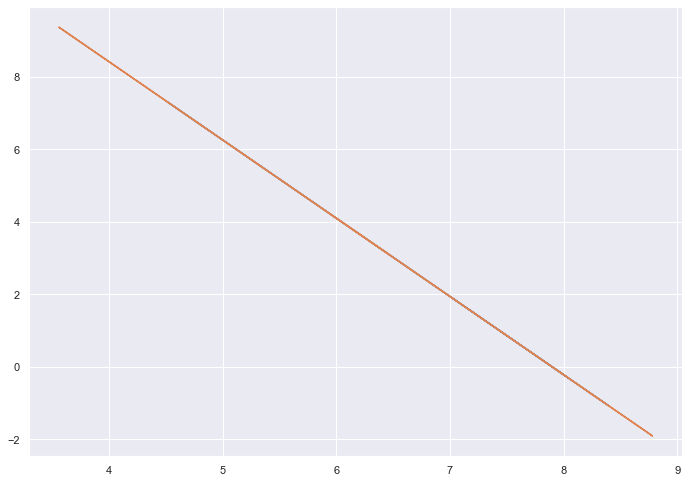

AGE
The model performance for training set
--------------------------------------
RMSE is 7.726732564112361
R2 score is 0.12162243187234212


The model performance for testing set
--------------------------------------
RMSE is 8.735269564354246
R2 score is 0.12611416137048048



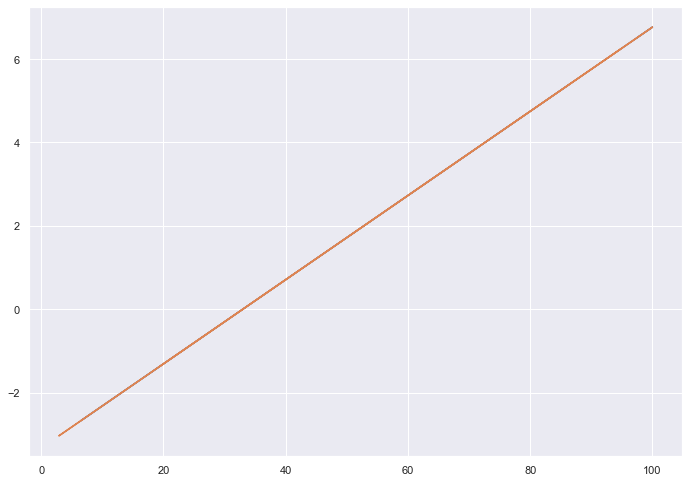

DIS
The model performance for training set
--------------------------------------
RMSE is 7.580810136967932
R2 score is 0.15448617285383404


The model performance for testing set
--------------------------------------
RMSE is 8.751980993202837
R2 score is 0.1227673040729681



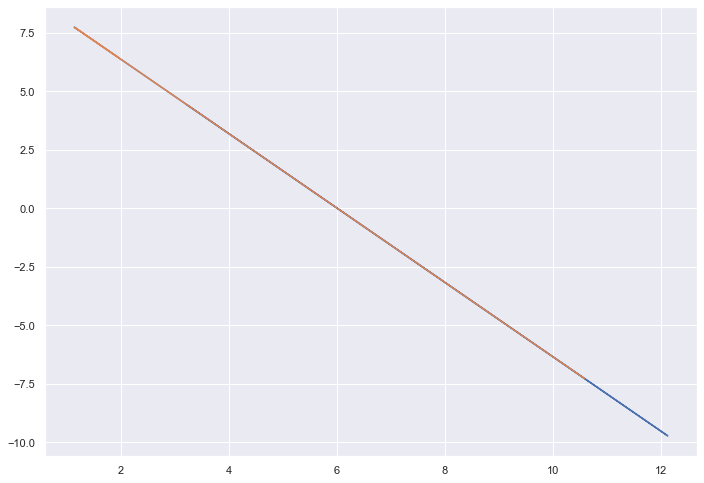

RAD
The model performance for training set
--------------------------------------
RMSE is 6.455047354147067
R2 score is 0.38696066721009215


The model performance for testing set
--------------------------------------
RMSE is 7.2746112478299105
R2 score is 0.39393157588153627



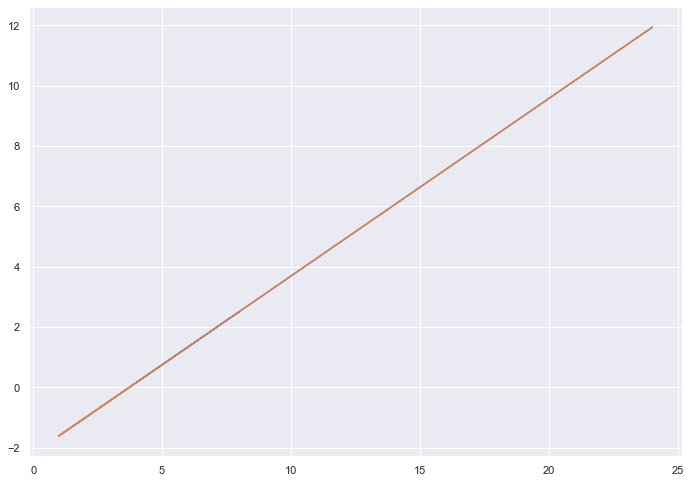

TAX
The model performance for training set
--------------------------------------
RMSE is 6.689220283969089
R2 score is 0.3416748136638885


The model performance for testing set
--------------------------------------
RMSE is 7.635084567111513
R2 score is 0.3323793181746625



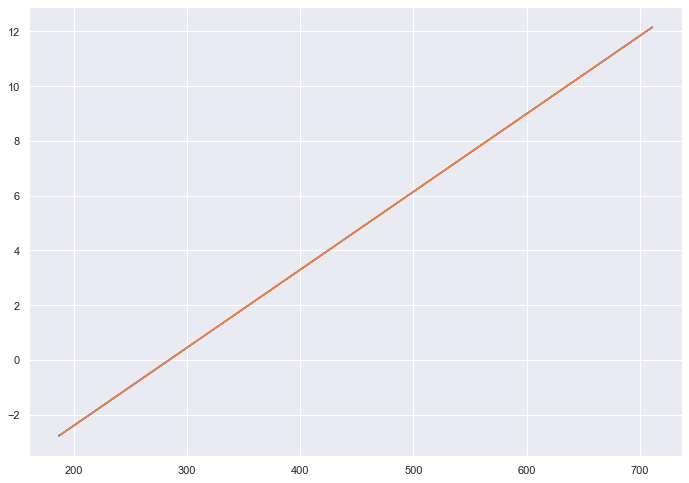

PTRATIO
The model performance for training set
--------------------------------------
RMSE is 7.889794315633393
R2 score is 0.0841574065286006


The model performance for testing set
--------------------------------------
RMSE is 8.960310103374143
R2 score is 0.08050756818406724



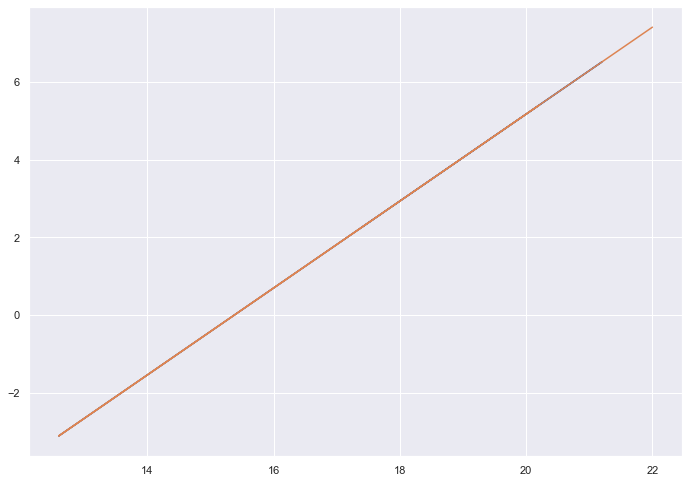

B
The model performance for training set
--------------------------------------
RMSE is 7.903852273097807
R2 score is 0.08089082038677109


The model performance for testing set
--------------------------------------
RMSE is 8.183100025473538
R2 score is 0.2331016593539048



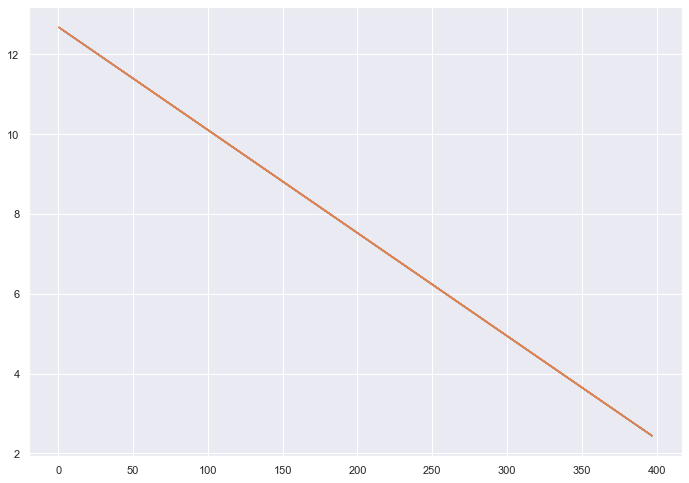

LSTAT
The model performance for training set
--------------------------------------
RMSE is 7.2697182263132385
R2 score is 0.22245661555314067


The model performance for testing set
--------------------------------------
RMSE is 8.469057954700805
R2 score is 0.17856673131547385



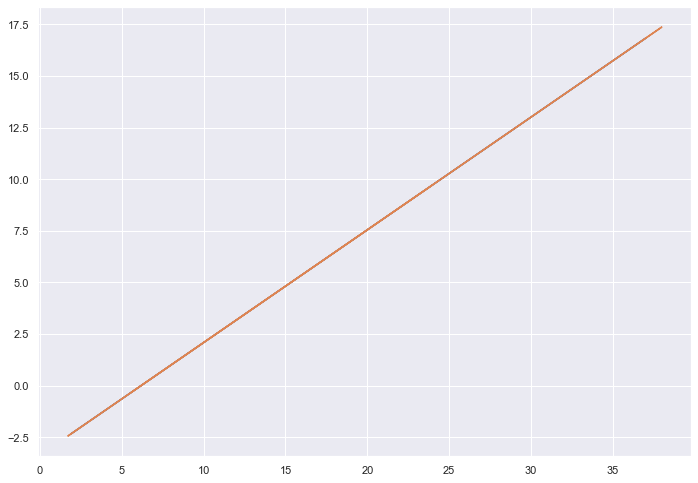

In [33]:
#CMDEV
print("CMDEV")
trainingTesting(X_train1, X_test1, Y_train1, Y_test1)
# ZN
print("ZN")
trainingTesting(X_train2, X_test2, Y_train2, Y_test2) 
# INDUS
print("INDUS")
trainingTesting(X_train3, X_test3, Y_train3, Y_test3) 
# CHAS 
print("CHAS")
trainingTesting(X_train4, X_test4, Y_train4, Y_test4) 
# NOX
print("NOX")
trainingTesting(X_train5, X_test5, Y_train5, Y_test5) 
# RM
print("RM")
trainingTesting(X_train6, X_test6, Y_train6, Y_test6) 
# AGE
print("AGE")
trainingTesting(X_train7, X_test7, Y_train7, Y_test7) 
# DIS
print("DIS")
trainingTesting(X_train8, X_test8, Y_train8, Y_test8) 
# RAD
print("RAD")
trainingTesting(X_train9, X_test9, Y_train9, Y_test9) 
# TAX
print("TAX")
trainingTesting(X_train10, X_test10, Y_train10, Y_test10) 
# PTRATIO
print("PTRATIO")
trainingTesting(X_train11, X_test11, Y_train11, Y_test11) 
# B
print("B")
trainingTesting(X_train12, X_test12, Y_train12, Y_test12) 
# LSTAT
print("LSTAT")
trainingTesting(X_train13, X_test13, Y_train13, Y_test13)

##### (k) CRIM Multiple Regression Model<hr>
1. **Fit a multiple regression model to predict the response using all the predictors. Describe your results.**
The results with all the predictors, have a R^2 of 0.461 in the trainig and 0.36 in the testing, this means that the Per capita CRIME is hard to predict because is something that depends on the humans behavior, so the data is very erratic.

2. **For which predictors can we get the best results?** 
With the predictors that have more correlation with the Per Capita Crime 

3. **Which predictors can be eliminated?**  
Any predictor that have negative correlation with the Per Capita Crime

##### 2.3.2 Dimension Reduction for Multiple Regression

In [59]:
X_All = boston.drop(['CRIM', 'TOWN'], axis=1)

X_RAD_TAX = pd.DataFrame(np.c_[boston['RAD'],boston['TAX'] ], columns = ['RAD','TAX'])
X_RAD_LSTAT = pd.DataFrame(np.c_[boston['RAD'],boston['LSTAT'] ], columns = ['RAD','LSTAT'])
X_TAX_LSTAT = pd.DataFrame(np.c_[boston['TAX'],boston['LSTAT'] ], columns = ['TAX','LSTAT'])
X_RAD_NOX = pd.DataFrame(np.c_[boston['RAD'],boston['NOX'] ], columns = ['RAD','NOX'])

X_RAD_TAX_LSTAT = pd.DataFrame(np.c_[boston['RAD'],boston['TAX'],boston['LSTAT']  ], columns = ['RAD','TAX','LSTAT'])
X_RAD_TAX_NOX = pd.DataFrame(np.c_[boston['RAD'],boston['TAX'],boston['NOX']], columns = ['RAD','TAX','NOX'])
X_RAD_NOX_LSTAT = pd.DataFrame(np.c_[boston['RAD'],boston['NOX'],boston['LSTAT']], columns = ['RAD','NOX','LSTAT'])
X_B_DIS_CMEDV = pd.DataFrame(np.c_[boston['B'],boston['DIS'],boston['CMEDV'] ], columns = ['B','DIS','CMEDV'])

X_RAD_TAX_LSTAT_NOX = pd.DataFrame(np.c_[boston['RAD'],boston['TAX'],boston['LSTAT'],boston['NOX']], columns = ['RAD','TAX','LSTAT','NOX'])
X_RAD_TAX_LSTAT_INDUS = pd.DataFrame(np.c_[boston['RAD'],boston['TAX'],boston['LSTAT'],boston['INDUS']], columns = ['RAD','TAX','LSTAT','INDUS'])
X_RAD_TAX_LSTAT_AGE = pd.DataFrame(np.c_[boston['RAD'],boston['TAX'],boston['LSTAT'],boston['AGE']], columns = ['RAD','TAX','LSTAT','AGE'] )
X_B_DIS_CMEDV_RM = pd.DataFrame(np.c_[boston['B'],boston['DIS'],boston['CMEDV'],boston['RM']], columns = ['B','DIS','CMEDV','RM'])



Y_Crim = boston['CRIM']

##### 2.4.2 Data partition for Multiple Regression

In [35]:
from sklearn.model_selection import train_test_split

# Partimos los datos de training y test en 70% y 30%
# Asignamos un valor a random_state para asegurar que haya consistencia
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_All, Y_Crim, test_size = 0.3, random_state=5)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_RAD_TAX, Y_Crim, test_size = 0.3, random_state=5)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_RAD_LSTAT, Y_Crim, test_size = 0.3, random_state=5)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_TAX_LSTAT, Y_Crim, test_size = 0.3, random_state=5)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X_RAD_NOX, Y_Crim, test_size = 0.3, random_state=5)

X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X_RAD_TAX_LSTAT, Y_Crim, test_size = 0.3, random_state=5)
X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X_RAD_TAX_NOX , Y_Crim, test_size = 0.3, random_state=5)
X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X_RAD_NOX_LSTAT, Y_Crim, test_size = 0.3, random_state=5)
X_train9, X_test9, Y_train9, Y_test9 = train_test_split(X_B_DIS_CMEDV, Y_Crim, test_size = 0.3, random_state=5)

X_train10, X_test10, Y_train10, Y_test10 = train_test_split(X_RAD_TAX_LSTAT_NOX, Y_Crim, test_size = 0.3, random_state=5)
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X_RAD_TAX_LSTAT_INDUS, Y_Crim, test_size = 0.3, random_state=5)
X_train12, X_test12, Y_train12, Y_test12 = train_test_split(X_RAD_TAX_LSTAT_AGE, Y_Crim, test_size = 0.3, random_state=5)
X_train13, X_test13, Y_train13, Y_test13 = train_test_split(X_B_DIS_CMEDV_RM, Y_Crim, test_size = 0.3, random_state=5)


## 3.2 Model Creation for Multiple Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 4.2 y 5.2 Training and Prediction of New Data for Multiple Regression

------------Model with all predictors
The model performance for training set
--------------------------------------
RMSE is 6.051565593438625
R2 score is 0.46120325336250445


The model performance for testing set
--------------------------------------
RMSE is 7.447404845932344
R2 score is 0.36479778391383133



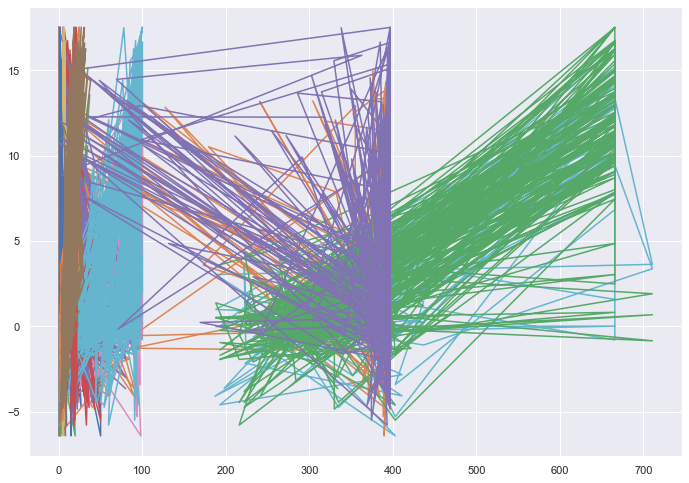

------------Model with RAD and TAX
The model performance for training set
--------------------------------------
RMSE is 6.450140820427953
R2 score is 0.3878922653312685


The model performance for testing set
--------------------------------------
RMSE is 7.267025504559834
R2 score is 0.39519489628645277



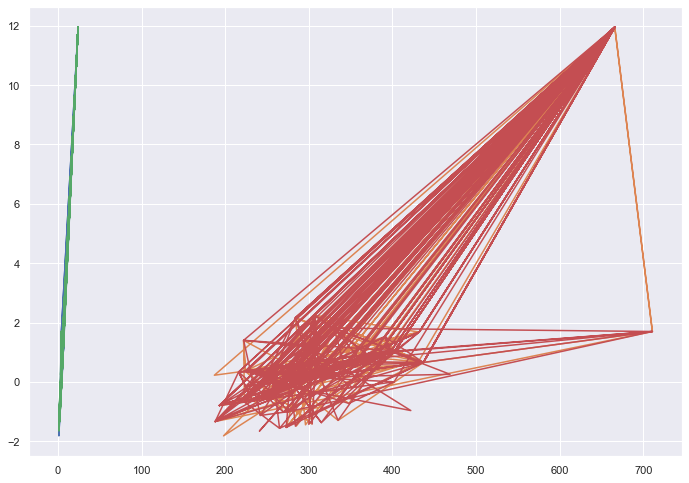

------------Model with RAD and LSTAT
The model performance for training set
--------------------------------------
RMSE is 6.293349147685553
R2 score is 0.41728911892977183


The model performance for testing set
--------------------------------------
RMSE is 7.106720663178773
R2 score is 0.4215836383685112



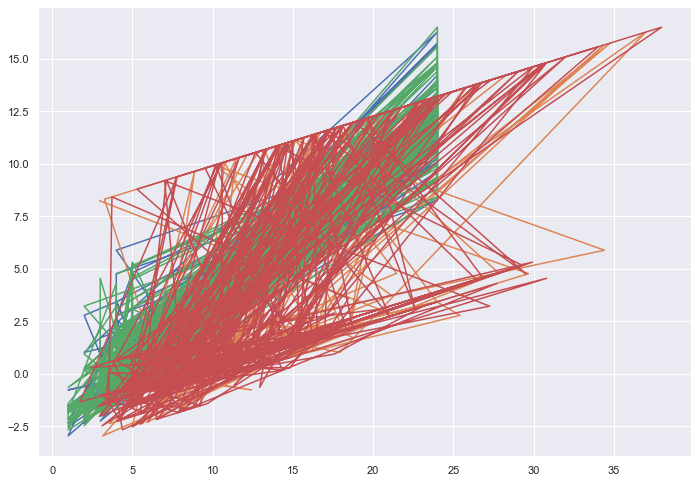

------------Model with TAX and LSTAT
The model performance for training set
--------------------------------------
RMSE is 6.528270966334097
R2 score is 0.3729736107159628


The model performance for testing set
--------------------------------------
RMSE is 7.520693218717216
R2 score is 0.3522344825513386



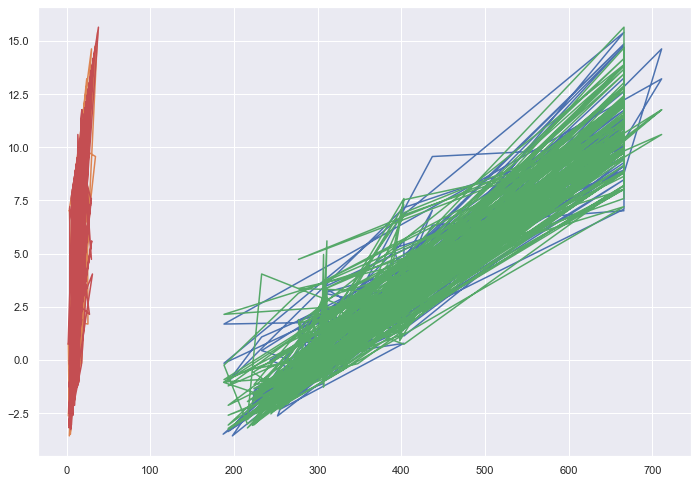

------------Model with RAD and NOX
The model performance for training set
--------------------------------------
RMSE is 6.443072654526785
R2 score is 0.3892330448976331


The model performance for testing set
--------------------------------------
RMSE is 7.259795251811186
R2 score is 0.39639778689907035



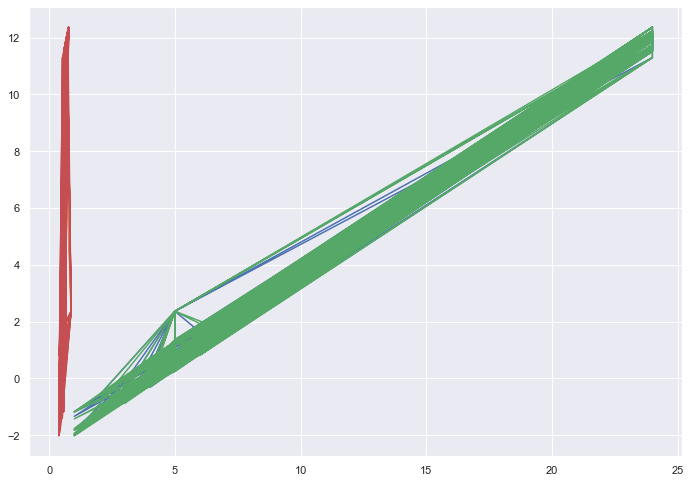

------------Model with RAD and TAX and LSTAT
The model performance for training set
--------------------------------------
RMSE is 6.2927904867597
R2 score is 0.4173925688873956


The model performance for testing set
--------------------------------------
RMSE is 7.104214054776127
R2 score is 0.42199159238574746



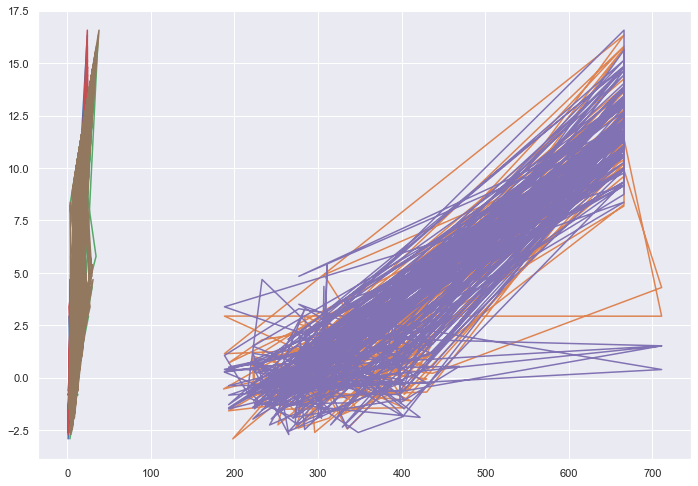

------------Model with RAD and TAX and NOX
The model performance for training set
--------------------------------------
RMSE is 6.441687581779184
R2 score is 0.3894956108446568


The model performance for testing set
--------------------------------------
RMSE is 7.257840807718352
R2 score is 0.3967227404113004



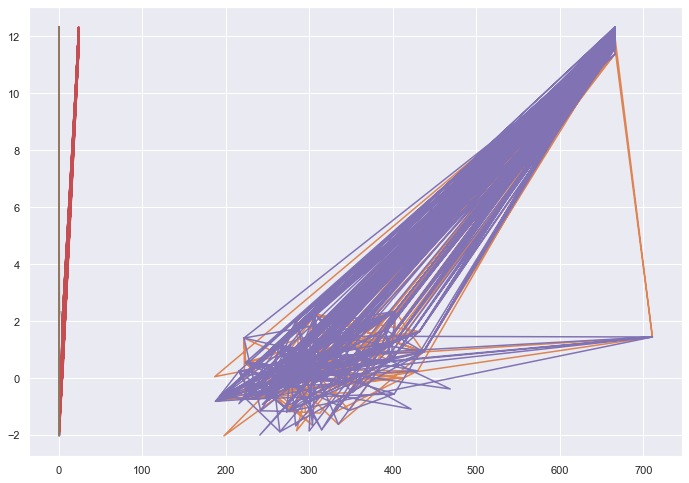

------------Model with RAD and LSTAT and NOX
The model performance for training set
--------------------------------------
RMSE is 6.2893607484742065
R2 score is 0.4180274689313309


The model performance for testing set
--------------------------------------
RMSE is 7.102466443892488
R2 score is 0.42227593335058067



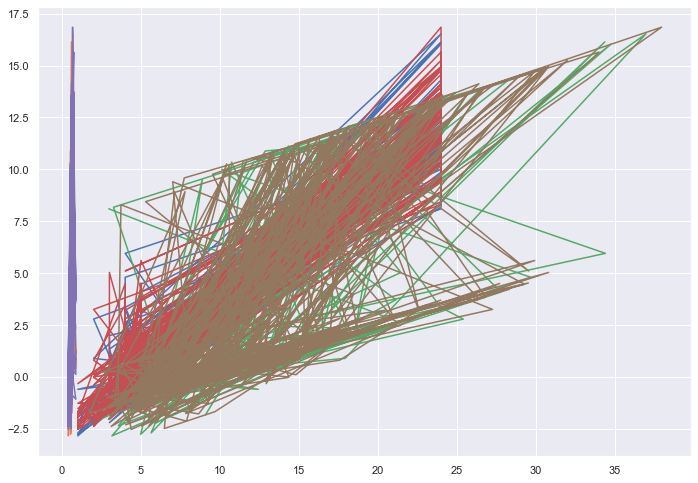

------------Model with B and DIS and CMEDV
The model performance for training set
--------------------------------------
RMSE is 7.0538447719102395
R2 score is 0.2679491128941045


The model performance for testing set
--------------------------------------
RMSE is 8.041478027580947
R2 score is 0.2594168309546515



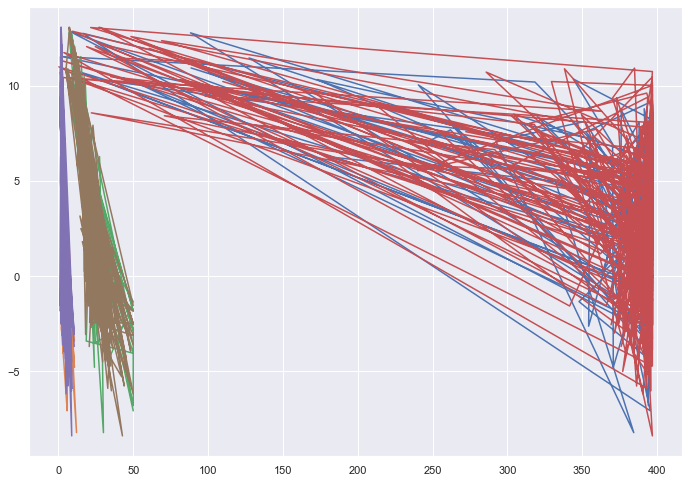

------------Model with RAD and TAX and NOX and LSTAT
The model performance for training set
--------------------------------------
RMSE is 6.289295419867095
R2 score is 0.4180395589541156


The model performance for testing set
--------------------------------------
RMSE is 7.101751541531798
R2 score is 0.422392229714993



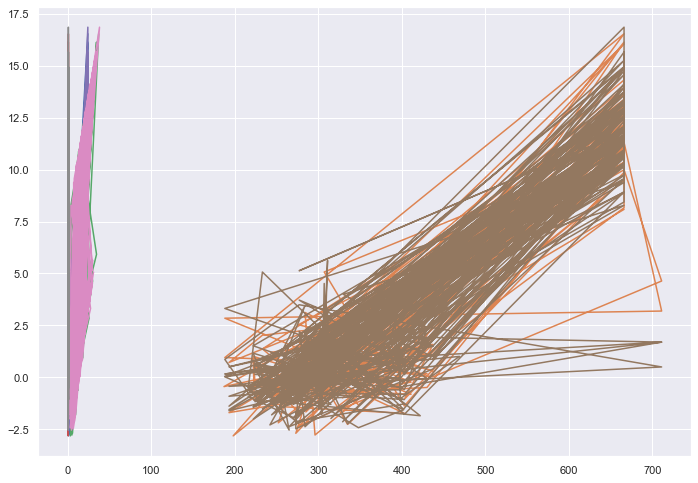

------------Model with RAD and TAX and LSTAT and INDUS
The model performance for training set
--------------------------------------
RMSE is 6.288317763523625
R2 score is 0.418220473685357


The model performance for testing set
--------------------------------------
RMSE is 7.093422203310066
R2 score is 0.4237463376670323



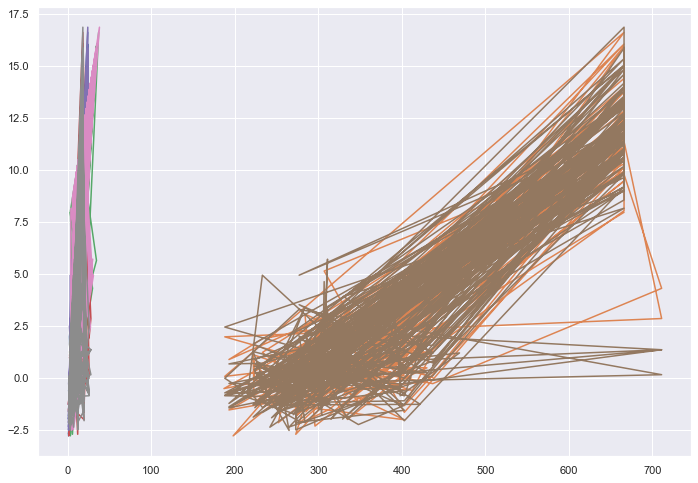

------------Model with RAD and TAX and LSTAT and AGE
The model performance for training set
--------------------------------------
RMSE is 6.292422318911282
R2 score is 0.4174607392960926


The model performance for testing set
--------------------------------------
RMSE is 7.104480279111383
R2 score is 0.42194827083429587



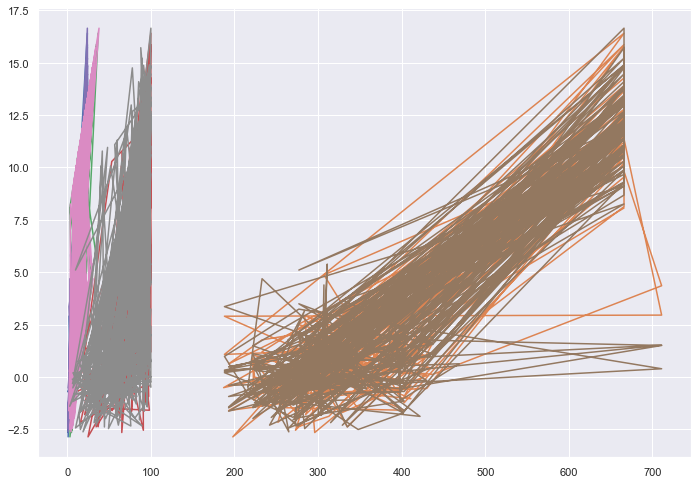

------------Model with B and DIS and CMEDV and RM
The model performance for training set
--------------------------------------
RMSE is 6.966203340730851
R2 score is 0.28602703203917934


The model performance for testing set
--------------------------------------
RMSE is 8.318367793269527
R2 score is 0.20753823798883408



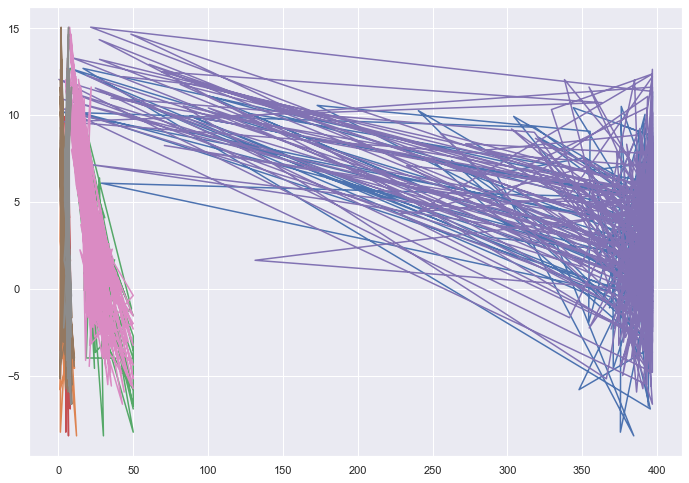

In [43]:
# model evaluation for training set
print("------------Model with all predictors")
trainingTesting(X_train1, X_test1, Y_train1, Y_test1)

print("------------Model with RAD and TAX")
trainingTesting(X_train2, X_test2, Y_train2, Y_test2)

print("------------Model with RAD and LSTAT")
trainingTesting(X_train3, X_test3, Y_train3, Y_test3)

print("------------Model with TAX and LSTAT")
trainingTesting(X_train4, X_test4, Y_train4, Y_test4)

print("------------Model with RAD and NOX")
trainingTesting(X_train5, X_test5, Y_train5, Y_test5)

print("------------Model with RAD and TAX and LSTAT")
trainingTesting(X_train6, X_test6, Y_train6, Y_test6)

print("------------Model with RAD and TAX and NOX")
trainingTesting(X_train7, X_test7, Y_train7, Y_test7)

print("------------Model with RAD and LSTAT and NOX")
trainingTesting(X_train8, X_test8, Y_train8, Y_test8)

print("------------Model with B and DIS and CMEDV")
trainingTesting(X_train9, X_test9, Y_train9, Y_test9)

print("------------Model with RAD and TAX and NOX and LSTAT")
trainingTesting(X_train10, X_test10, Y_train10, Y_test10)

print("------------Model with RAD and TAX and LSTAT and INDUS")
trainingTesting(X_train11, X_test11, Y_train11, Y_test11)

print("------------Model with RAD and TAX and LSTAT and AGE")
trainingTesting(X_train12, X_test12, Y_train12, Y_test12)

print("------------Model with B and DIS and CMEDV and RM")
trainingTesting(X_train13, X_test13, Y_train13, Y_test13)


##### (l) How do your results from (j) compare to your results from (k)? <hr>  
